In [2]:
# from plotly.offline import init_notebook_mode, iplot
#from plotly.graph_objs import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
#import plotly
import plotly.graph_objs as go
#plotly.tools.set_credentials_file(username='sfmaddox42', api_key='SOJVGjBN7E7orxpBFLlo')
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
import os.path as op
indir='/Users/smgroves/Dropbox (VU Basic Sciences)/SCLC/RNAseq-analysis/Drug_response'


In [4]:
outdir = '/Users/smgroves/Dropbox (VU Basic Sciences)/pycharm_workspace/mazebox/mazebox/examples/notebooks/bulk/'

In [5]:
distances = pd.read_csv(op.join(outdir,"arc_space/distances.csv"), header = None).T
distances.columns = ['SCLC-Y', 'SCLC-P','SCLC-N','SCLC-A2','SCLC-A']
distances.head()

SCLC-Y      SCLC-P     SCLC-N     SCLC-A2     SCLC-A
0  122.034899  107.833082  91.214260   93.282333  76.338367
1  122.334497  108.867795  95.302842  101.101440  77.636464
2  129.333514  112.065962  96.835822  101.923496  81.288051
3  129.561391  120.786395  98.340963  103.160870  83.854943
4  133.735308  122.521452  98.476548  103.607238  85.915890

In [6]:
clines = pd.read_csv(op.join(outdir,"arc_space/combined_clusters_2020-05-27-MC copy.csv"), index_col = 0)
clines

source subtype NEW_10_2020 10_08_2020
c.COLO668   CCLE      A2          A2         A2
c.CORL24    CCLE       A           N          A
c.CORL279   CCLE       A           A          A
c.CORL311   CCLE       P           P          P
c.CORL47    CCLE       A           A          A
...          ...     ...         ...        ...
m.NCIH82   Minna       N           N       uncl
m.NCIH841  Minna       Y           Y          Y
m.NCIH865  Minna      A2          A2         A2
m.NCIH889  Minna       A           A          A
m.SHP77    Minna      A2          A2         A2

[120 rows x 4 columns]

In [7]:
distances

SCLC-Y      SCLC-P      SCLC-N     SCLC-A2      SCLC-A
0    122.034899  107.833082   91.214260   93.282333   76.338367
1    122.334497  108.867795   95.302842  101.101440   77.636464
2    129.333514  112.065962   96.835822  101.923496   81.288051
3    129.561391  120.786395   98.340963  103.160870   83.854943
4    133.735308  122.521452   98.476548  103.607238   85.915890
..          ...         ...         ...         ...         ...
115  230.207672  194.007225  200.779181  196.377092  201.213696
116  231.127419  194.539084  201.173412  197.162703  211.501952
117  233.494297  195.253940  202.721233  197.703672  212.431043
118  234.437324  200.957922  203.225613  198.392606  216.703075
119  236.833498  204.608804  218.141649  216.080333  223.981942

[120 rows x 5 columns]

In [8]:
ordering = pd.read_csv(op.join(outdir,"arc_space/ordering.csv"), header = None).T


In [9]:
#change from MATLAB to python indexing
ordering = ordering-1

In [10]:
for c in ordering:
    ordering[f"order_{c}"] = clines.index[list(ordering[c])]

In [11]:
ordering.columns = [0,1,2,3,4, 'SCLC-Y','SCLC-P','SCLC-N','SCLC-A2','SCLC-A']

In [12]:
ordering

0    1    2    3   4      SCLC-Y      SCLC-P      SCLC-N     SCLC-A2  \
0     37   33   54   50  90  c.NCIH2286   c.NCIH211   m.HCC4001    m.DMS153   
1     49   91  105   63  82    c.SW1271   m.NCIH211   m.NCIH524  m.NCIH1238   
2     18  106  107    8  71  c.NCIH1339   m.NCIH526    m.NCIH60    c.DMS153   
3     44   41   40  114  74   c.NCIH841   c.NCIH526   c.NCIH524   m.NCIH774   
4    116   60   59   29  89   m.NCIH841  m.NCIH1048    m.HCC970  c.NCIH2029   
..   ...  ...  ...  ...  ..         ...         ...         ...         ...   
115    4    1   49   37  46    c.CORL47    c.CORL24    c.SW1271  c.NCIH2286   
116   13   36   18    7  49     c.HCC33  c.NCIH2227  c.NCIH1339    c.DMS114   
117   15   12   75   49  37  c.NCIH1092     c.DMS79  m.NCIH1688    c.SW1271   
118   21   35   11   18  18   c.NCIH146  c.NCIH2196     c.DMS53  c.NCIH1339   
119   42   27   27   27  27    c.NCIH69   c.NCIH196   c.NCIH196   c.NCIH196   

         SCLC-A  
0    m.NCIH2108  
1    m.NCIH1926  
2    m.NCIH1522  
3    m.NCIH1672  
4    m.NCIH2107  
..          ...  
115      c.SBC5  
116    c.SW1271  
117  c.NCIH2286  
118  c.NCIH1339  
119   c.NCIH196  

[120 rows x 10 columns]

In [13]:
data = pd.read_csv(op.join(outdir,'arc_space/SCLC_combined_Minna_CCLE_batch_corrected_wo_lowgenes.csv'), header = 0, index_col=0)
data = data.T

In [14]:
data

A1BG      A1CF       A2M     A2ML1    A4GALT      AAAS  \
m.DMS153   2.955199  0.077212  2.267502  0.011011  2.453512  4.693518   
m.NCIH60   3.239727  0.167166  0.122302 -0.007241  1.528297  5.889316   
m.NCIH69   3.599770  0.117398  0.085891 -0.005086  1.428711  6.002266   
m.NCIH82   3.055231  0.536179  1.586479 -0.004471  0.359365  5.981354   
m.NCIH128  4.579507  0.088160  0.064500 -0.003819  0.865621  5.222291   
...             ...       ...       ...       ...       ...       ...   
c.NCIH889  5.073359  0.242981  0.039852  0.114451  0.086832  5.282937   
c.SBC5     4.423783  0.008349  0.681201  0.043520  2.641161  6.101916   
c.SCLC21H  3.713345  0.003494  0.032354  0.004658  0.764500  5.704675   
c.SHP77    3.438644 -0.073834  1.635919  0.003820  0.861152  5.751452   
c.SW1271   4.209637 -0.001700  0.303402  0.031692  1.868799  6.244721   

               AACS     AADAC   AADACL2     AADAT  ...    ZWILCH     ZWINT  \
m.DMS153   5.604911  0.023528 -0.010271  2.941738  ...  3.939669  6.852976   
m.NCIH60   4.345321  0.050939 -0.022236  3.558743  ...  4.864912  5.796933   
m.NCIH69   4.460012  0.035774 -0.015616  3.888875  ...  4.786084  6.610108   
m.NCIH82   4.859381  0.031453 -0.013730  3.640416  ...  4.725295  5.369400   
m.NCIH128  5.884253  0.026864 -0.011727  3.003065  ...  4.081717  6.199033   
...             ...       ...       ...       ...  ...       ...       ...   
c.NCIH889  5.712913 -0.024057  0.010501  3.765605  ...  3.665540  6.054454   
c.SBC5     4.188138  0.008194  0.002690  2.398242  ...  4.227682  4.940176   
c.SCLC21H  5.191045  0.023815  0.014304  3.706236  ...  3.310412  5.770995   
c.SHP77    5.573440  0.029711  0.011731  3.539081  ...  4.972090  5.493339   
c.SW1271   3.885183  2.189045  0.038158  1.689162  ...  5.413040  7.036555   

               ZXDA      ZXDB      ZXDC    ZYG11A    ZYG11B       ZYX  \
m.DMS153   1.664986  2.541377  3.696684  2.157076  3.203573  0.487181   
m.NCIH60   2.122629  4.070915  3.737488  2.397393  3.531696  5.936393   
m.NCIH69   0.114373  0.134965  3.466131  1.863985  3.208492  3.744837   
m.NCIH82   1.575644  3.127523  3.856145  2.255620  3.311325  4.646812   
m.NCIH128  1.596850  2.570837  3.553932  2.100612  3.854498  1.620770   
...             ...       ...       ...       ...       ...       ...   
c.NCIH889  0.124721  2.026581  3.958561 -0.038552  3.535678  2.027946   
c.SBC5     1.863922  2.592759  3.522133  2.436774  2.542059  6.252048   
c.SCLC21H  0.798272  2.211449  3.864399  1.035032  2.938834  4.599310   
c.SHP77    1.537014  2.918387  3.081628 -0.138525  2.524447  5.381763   
c.SW1271   0.993272  2.262222  3.759904  1.419227  2.299398  6.788429   

              ZZEF1      ZZZ3  
m.DMS153   2.299240  4.944759  
m.NCIH60   3.690349  3.893902  
m.NCIH69   4.100225  4.095373  
m.NCIH82   4.140049  5.760181  
m.NCIH128  3.587906  4.814864  
...             ...       ...  
c.NCIH889  3.289557  4.905469  
c.SBC5     2.674662  3.574245  
c.SCLC21H  3.066311  4.852598  
c.SHP77    3.937478  3.831536  
c.SW1271   3.867651  4.254026  

[120 rows x 15950 columns]

In [15]:
# data.T.groupby(data.T.index).mean().to_csv(op.join(outdir,'arc_space/SCLC_combined_Minna_CCLE_batch_corrected_wo_lowgenes.csv'))

In [16]:
for c in distances:
    x = distances[c]
    x.index = ordering[c].values
    distances[c] = x.sort_index().values

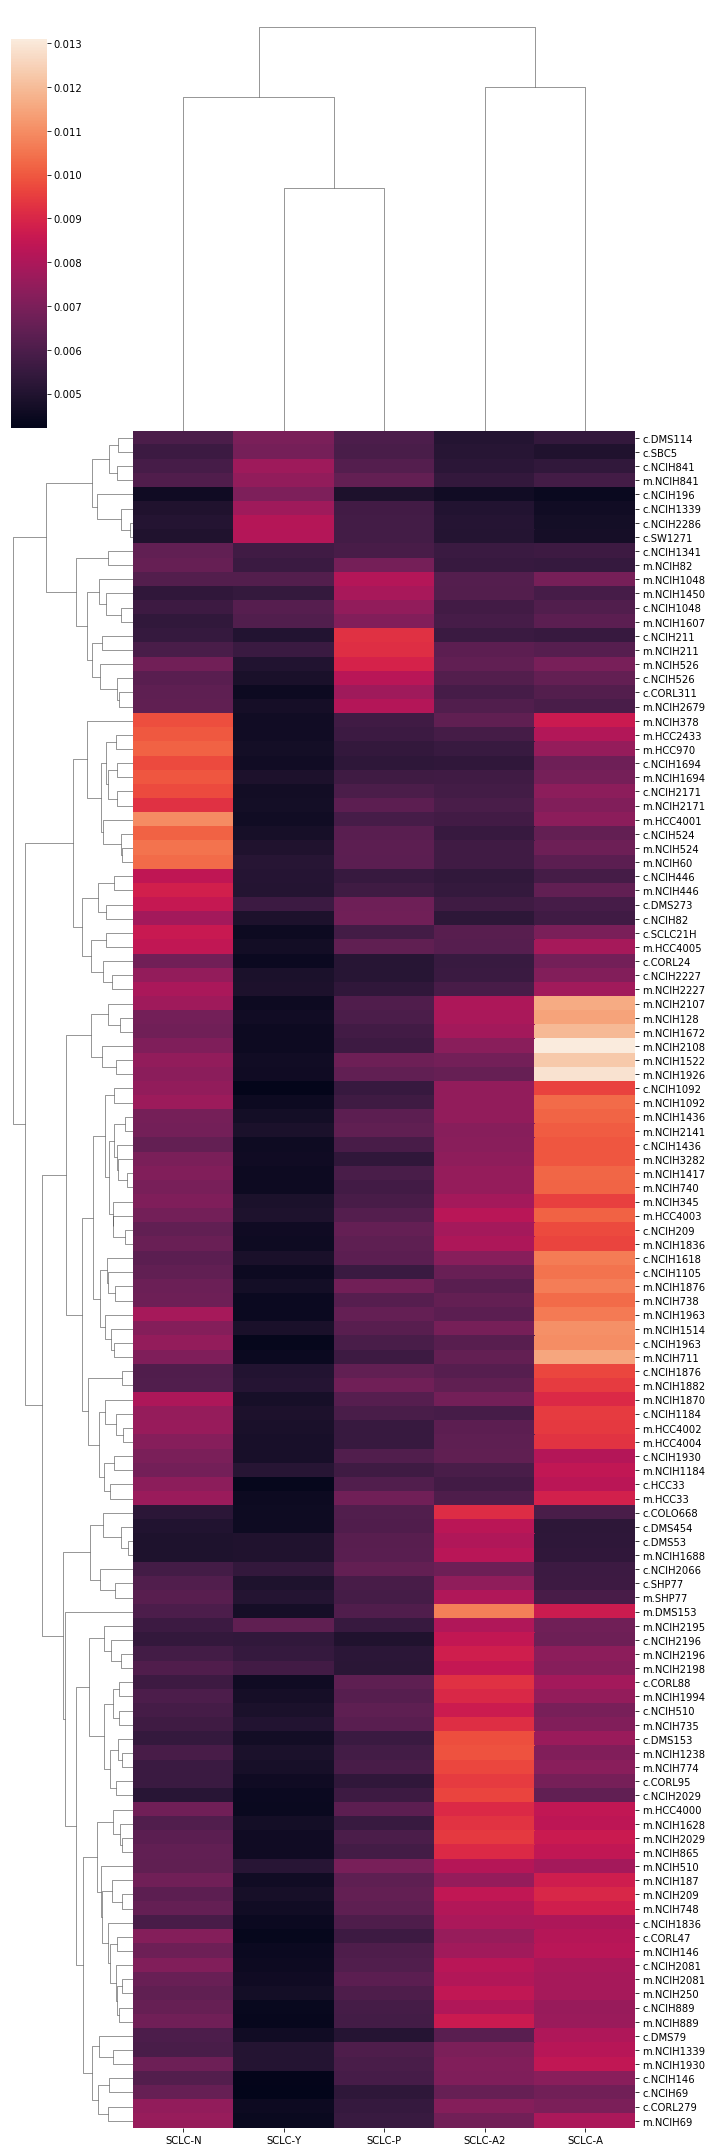

In [17]:
distances.index = clines.index
# for i,r in distances.iterrows():
#     print(i, r.sort_values().index.values)
sns.clustermap(1/distances, yticklabels = True, figsize = (10,30))

In [16]:
distances.loc[distances.min(axis = 1)>140]

SCLC-Y      SCLC-P      SCLC-N     SCLC-A2      SCLC-A
c.CORL24    222.904409  194.007225  147.307784  179.723460  145.958027
c.DMS114    143.506320  166.348368  167.870446  197.162703  184.054165
c.NCIH1341  174.541664  169.016299  154.544885  178.412860  176.332192
c.NCIH196   141.782880  204.608804  218.141649  216.080333  223.981942
c.NCIH2066  184.457404  153.792635  172.523579  149.085408  177.722195
c.NCIH69    236.833498  187.824955  152.425468  152.541157  146.986937
c.SBC5      145.433444  168.450071  178.199310  194.844602  201.213696
m.NCIH82    178.272571  145.130066  152.464232  181.332542  182.733808

In [25]:
pcs = pd.read_csv(op.join(outdir,"arc_space/pc.csv"), header = None)
pcs.index = clines.index

/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


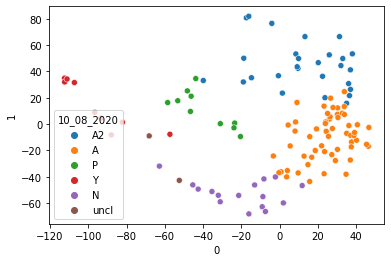

In [26]:
sns.scatterplot(pcs[0],pcs[1], hue = clines['10_08_2020'])

In [19]:
go = pd.read_csv('./arc_space/go.csv', header=0, index_col=0)
go.sort_values("P value (Mann-Whitney)")

Feature Name  \
archetype #                                                      
SCLC-Y              GO PYRIMIDINE NUCLEOSIDE METABOLIC PROCESS   
SCLC-Y              GO PYRIMIDINE NUCLEOSIDE CATABOLIC PROCESS   
SCLC-Y                  GO POSITIVE REGULATION OF ERAD PATHWAY   
SCLC-Y              GO POSITIVE REGULATION OF VASOCONSTRICTION   
SCLC-Y                    GO NEGATIVE REGULATION OF CELL AGING   
...                                                        ...   
SCLC-A       GO REGULATION OF DOUBLE STRAND BREAK REPAIR VI...   
SCLC-A2         GO INORGANIC ION IMPORT ACROSS PLASMA MEMBRANE   
SCLC-P                  GO SMALL MOLECULE BIOSYNTHETIC PROCESS   
SCLC-P                  GO T HELPER 2 CELL CYTOKINE PRODUCTION   
SCLC-A                    GO ERROR PRONE TRANSLESION SYNTHESIS   

             P value (Mann-Whitney)  Median Difference  Mean Difference  \
archetype #                                                               
SCLC-Y                     0.000039            0.78080          0.76899   
SCLC-Y                     0.000039            1.04110          1.00940   
SCLC-Y                     0.000039            0.64733          0.65648   
SCLC-Y                     0.000039            0.75239          0.69292   
SCLC-Y                     0.000041            0.75383          0.74928   
...                             ...                ...              ...   
SCLC-A                     0.029747            0.26767          0.18330   
SCLC-A2                    0.029747            0.20803          0.15231   
SCLC-P                     0.029747            0.13044          0.11913   
SCLC-P                     0.029747            0.24135          0.18815   
SCLC-A                     0.029747            0.11441          0.11789   

             Significant after Benjamini-Hochberg correction?  \
archetype #                                                     
SCLC-Y                                                      1   
SCLC-Y                                                      1   
SCLC-Y                                                      1   
SCLC-Y                                                      1   
SCLC-Y                                                      1   
...                                                       ...   
SCLC-A                                                      1   
SCLC-A2                                                     1   
SCLC-P                                                      1   
SCLC-P                                                      1   
SCLC-A                                                      1   

             Is first bin maximal?  
archetype #                         
SCLC-Y                           1  
SCLC-Y                           1  
SCLC-Y                           1  
SCLC-Y                           1  
SCLC-Y                           1  
...                            ...  
SCLC-A                           1  
SCLC-A2                          1  
SCLC-P                           1  
SCLC-P                           1  
SCLC-A                           1  

[2517 rows x 6 columns]

In [40]:
for i,r in go.iterrows():
    if "METAB" in r['Feature Name']:
        print(i, r[['Feature Name','P value (Mann-Whitney)']].values)
        

SCLC-A2 ['GO SEROTONIN METABOLIC PROCESS' 5.93e-05]
SCLC-A2 ['GO PRIMARY AMINO COMPOUND METABOLIC PROCESS' 9.81e-05]
SCLC-A2 ['GO AMMONIUM ION METABOLIC PROCESS' 0.00022370000000000002]
SCLC-A2 ['GO SPHINGOMYELIN METABOLIC PROCESS' 0.0009903]
SCLC-A2 ['GO REGULATION OF LIPOPROTEIN METABOLIC PROCESS' 0.0021804000000000003]
SCLC-A2 ['GO TOXIN METABOLIC PROCESS' 0.0011741]
SCLC-A2 ['GO NEUROTRANSMITTER METABOLIC PROCESS' 0.00040918]
SCLC-A2 ['GO INDOLALKYLAMINE METABOLIC PROCESS' 0.0018542]
SCLC-A2 ['GO DOPAMINE METABOLIC PROCESS' 0.0025586]
SCLC-A2 ['GO POLY N ACETYLLACTOSAMINE METABOLIC PROCESS' 0.0045725]
SCLC-A2 ['GO GLYCOSPHINGOLIPID METABOLIC PROCESS' 0.0016396000000000002]
SCLC-A2 ['GO VITAMIN D METABOLIC PROCESS' 0.0035004]
SCLC-A2 ['GO INDOLE CONTAINING COMPOUND METABOLIC PROCESS' 0.0018542]
SCLC-A2 ['GO CELLULAR BIOGENIC AMINE METABOLIC PROCESS' 0.00023453]
SCLC-A2 ['GO DRUG METABOLIC PROCESS' 0.0094624]
SCLC-A2 ['GO REGULATION OF POLYSACCHARIDE METABOLIC PROCESS' 0.002094300000

The go terms below are the ones I picked out for the table in the manuscript.

In [31]:
gos = pd.read_csv('./arc_space/gos.csv', header=0)
# go.sort_values("P value (Mann-Whitney)")

In [32]:
gos['logp'] = np.log10(gos['P-Value'])

In [33]:
gos

Enriched Gene Sets  Log-Mean Difference  \
0                    Forebrain neuron fate commitment              0.77700   
1                                Thalamus development              0.36300   
2         Regulation of long-term synaptic depression              0.55940   
3   Positive regulation of oligodendrocyte differe...              0.29700   
4                                 Dendritic transport              0.25600   
5                                 G0 to G1 transition              0.18500   
6                                 Histamine secretion              0.74000   
7              CD8+ Alpha Beta T Cell Differentiation              0.66100   
8                         Detection of other organism              0.64100   
9                                 Tolerance induction              0.60400   
10              Detection of external biotic stimulus              0.57700   
11  Negative regulation of Alpha Beta T Cell Proli...              0.50200   
12    Negative regulation of B cell apoptotic process              0.50100   
13         Regulation of T cell mediated cytotoxicity              0.49500   
14                                 Synapse maturation              0.80651   
15                                   Oxygen transport              0.77952   
16                                Synaptic plasticity              0.77358   
17                            Response to L glutamate              0.65875   
18                    Locomotory exploration behavior              0.51113   
19    Modification of postsynaptic actin cytoskeleton              0.45939   
20                    Response to electrical stimulus              0.45091   
21                Neuromuscular synaptic transmission              0.43283   
22               Detoxification of inorganic compound              1.37000   
23     Regulation of glucocorticoid metabolic process              0.87300   
24                  L Ascorbic Acid metabolic process              0.52800   
25                   Cardiolipid biosynthetic process              0.52800   
26                              AMP metabolic process              0.41800   
27   Mitochondrial respiratory chain complex assembly              0.23300   
28                                         Glycolysis              0.21000   
29                               Base excision repair              0.21800   
30  Antigen processing and presentation of peptide...              1.61620   
31                                                NaN                  NaN   
32                       Response to interferon alpha              1.48310   
33            Negative regulation of ECM organization              1.32790   
34  Positive regulation of cell migration involved...              1.21260   
35                                                NaN                  NaN   
36                    Endodermal cell differentiation              1.18600   
37                  Inflammatory response to wounding              1.16850   
38                      Collagen biosynthetic process              1.04590   
39       Regulation of programmed necrotic cell death              0.89700   

     P-Value Archetype      logp  
0   0.004700    SCLC-A -2.327902  
1   0.008500    SCLC-A -2.070581  
2   0.004700    SCLC-A -2.327902  
3   0.017000    SCLC-A -1.769551  
4   0.017000    SCLC-A -1.769551  
5   0.003200    SCLC-A -2.494850  
6   0.000270   SCLC-A2 -3.568636  
7   0.000170   SCLC-A2 -3.769551  
8   0.000410   SCLC-A2 -3.387216  
9   0.005700   SCLC-A2 -2.244125  
10  0.000798   SCLC-A2 -3.097997  
11  0.001800   SCLC-A2 -2.744727  
12  0.002200   SCLC-A2 -2.657577  
13  0.008500   SCLC-A2 -2.070581  
14  0.000340    SCLC-N -3.468521  
15  0.004080    SCLC-N -2.389340  
16  0.000270    SCLC-N -3.568636  
17  0.000210    SCLC-N -3.677781  
18  0.007700    SCLC-N -2.113509  
19  0.003100    SCLC-N -2.508638  
20  0.000150    SCLC-N -3.823909  
21  0.001600    SCLC-N -2.795880  
22  0.001400    SCLC-P -2.85387

In [26]:
hallmark_expr = pd.read_csv('./arc_space/hallmarks_expression.csv', header=0, index_col = 0)
hallmark_expr

HALLMARK_TNFA_SIGNALING_VIA_NFKB  HALLMARK_HYPOXIA  \
c.COLO668                          2.934432          3.645312   
c.CORL24                           2.500774          3.933067   
c.CORL279                          2.702296          4.003144   
c.CORL311                          2.286375          3.404849   
c.CORL47                           2.643213          3.814697   
...                                     ...               ...   
m.NCIH82                           2.324174          3.375072   
m.NCIH841                          2.619069          3.373352   
m.NCIH865                          2.452378          3.571030   
m.NCIH889                          2.600395          3.626046   
m.SHP77                            3.088345          4.210292   

           HALLMARK_CHOLESTEROL_HOMEOSTASIS  HALLMARK_MITOTIC_SPINDLE  \
c.COLO668                          5.017617                  4.511493   
c.CORL24                           4.673492                  4.732706   
c.CORL279                          4.862216                  4.787436   
c.CORL311                          4.611723                  4.721954   
c.CORL47                           4.755754                  4.415625   
...                                     ...                       ...   
m.NCIH82                           4.453593                  4.616897   
m.NCIH841                          4.420194                  5.012223   
m.NCIH865                          4.508947                  4.755590   
m.NCIH889                          4.564419                  4.367839   
m.SHP77                            4.778045                  4.585117   

           HALLMARK_WNT_BETA_CATENIN_SIGNALING  HALLMARK_TGF_BETA_SIGNALING  \
c.COLO668                             3.336807                     3.888540   
c.CORL24                              3.615168                     4.096003   
c.CORL279                             3.589288                     3.987987   
c.CORL311                             3.565339                     3.665893   
c.CORL47                              3.140211                     3.929492   
...                                        ...                          ...   
m.NCIH82                              3.521406                     3.753643   
m.NCIH841                             3.761688                     4.322753   
m.NCIH865                             3.247118                     4.049960   
m.NCIH889                             3.295720                     3.665247   
m.SHP77                               3.654110                     4.228493   

           HALLMARK_IL6_JAK_STAT3_SIGNALING  HALLMARK_DNA_REPAIR  \
c.COLO668                          2.190798             5.179710   
c.CORL24                           2.088617             5.056342   
c.CORL279                          2.151788             5.051927   
c.CORL311                          1.971366             5.287007   
c.CORL47                           1.843416             5.299168   
...                                     ...                  ...   
m.NCIH82                           2.045752             5.301158   
m.NCIH841                          2.266435             5.195585   
m.NCIH865                          1.969254             5.157620   
m.NCIH889                          1.876273             5.214404   
m.SHP77                            2.165845             5.180171   

           HALLMARK_G2M_CHECKPOINT  HALLMARK_APOPTOSIS  ...  \
c.COLO668                 5.439689            3.808790  ...   
c.CORL24                  5.453408            3.730008  ...   
c.CORL279                 5.469975            3.807439  ...   
c.CORL311                 5.600016            3.493346  ...   
c.CORL47                  5.509422            3.643576  ...   
...                            ...                 ...  ...   
m.NCIH82                  5.610325            3.859177  ...   
m.NCIH841                 5.822254            3.678429  ...   
m.NCIH865           

In [328]:
go_expr = pd.read_csv('./arc_space/GOExpression_bp.txt', header=0, index_col = None, sep = '\t')
go_expr

GO_MITOCHONDRIAL_GENOME_MAINTENANCE  GO_REPRODUCTION  \
0                                   4.32             2.84   
1                                   4.35             3.08   
2                                   4.32             2.97   
3                                   4.25             2.74   
4                                   4.18             2.83   
..                                   ...              ...   
115                                 4.59             2.84   
116                                 4.40             2.93   
117                                 4.07             2.90   
118                                 4.39             2.84   
119                                 4.48             2.95   

     GO_SINGLE_STRAND_BREAK_REPAIR  GO_REGULATION_OF_DNA_RECOMBINATION  \
0                             3.98                                3.82   
1                             3.99                                3.81   
2                             3.81                                3.90   
3                             3.99                                3.79   
4                             4.04                                3.79   
..                             ...                                 ...   
115                           4.01                                4.18   
116                           4.24                                4.45   
117                           3.96                                3.84   
118                           3.88                                3.77   
119                           4.03                                3.76   

     GO_RIBOSOMAL_LARGE_SUBUNIT_ASSEMBLY  GO_RIBOSOMAL_SMALL_SUBUNIT_ASSEMBLY  \
0                                   6.67                                 7.55   
1                                   6.27                                 7.87   
2                                   6.54                                 7.73   
3                                   6.63                                 7.81   
4                                   6.46                                 7.96   
..                                   ...                                  ...   
115                                 7.29                                 8.23   
116                                 6.65                                 7.79   
117                                 6.18                                 7.49   
118                                 6.72                                 7.76   
119                                 6.70                                 7.79   

     GO_VERY_LONG_CHAIN_FATTY_ACID_METABOLIC_PROCESS  \
0                                               3.08   
1                                               3.21   
2                                               3.14   
3                                               2.83   
4                                               3.07   
..                                               ...   
115                                             3.22   
116                                             3.12   
117                                             3.05   
118                                             3.19   
119                                             3.30   

     GO_TRANSITION_METAL_ION_TRANSPORT  \
0                                 3.51   
1                                 3.38   
2                                 3.48   
3                                 3.27   
4                                 3.41   
..                                 ...   
115                               3.45   
116                               3.42   
117                               3.59   
118                               3.46   
119                               3.58   

     GO_MITOTIC_SISTER_CHROMATID_SEGREGATION  GO_CELL_CYCLE_CHECKPOINT  ...  \
0                                       5.10                      4.57  ...   
1                                       5.03                      4.61  ..

In [341]:
go_norm = (go_expr - go_expr.min())/(go_expr.max()-go_expr.min())

In [342]:
go_norm.max(axis = 0)

GO_MITOCHONDRIAL_GENOME_MAINTENANCE                                                                       1.0
GO_REPRODUCTION                                                                                           1.0
GO_SINGLE_STRAND_BREAK_REPAIR                                                                             1.0
GO_REGULATION_OF_DNA_RECOMBINATION                                                                        1.0
GO_RIBOSOMAL_LARGE_SUBUNIT_ASSEMBLY                                                                       1.0
                                                                                                         ... 
GO_NEGATIVE_REGULATION_OF_CATION_CHANNEL_ACTIVITY                                                         1.0
GO_POSITIVE_REGULATION_OF_CATION_CHANNEL_ACTIVITY                                                         1.0
GO_REGULATION_OF_CYSTEINE_TYPE_ENDOPEPTIDASE_ACTIVITY_INVOLVED_IN_APOPTOTIC_SIGNALING_PATHWAY             1.0
GO_POSITIV

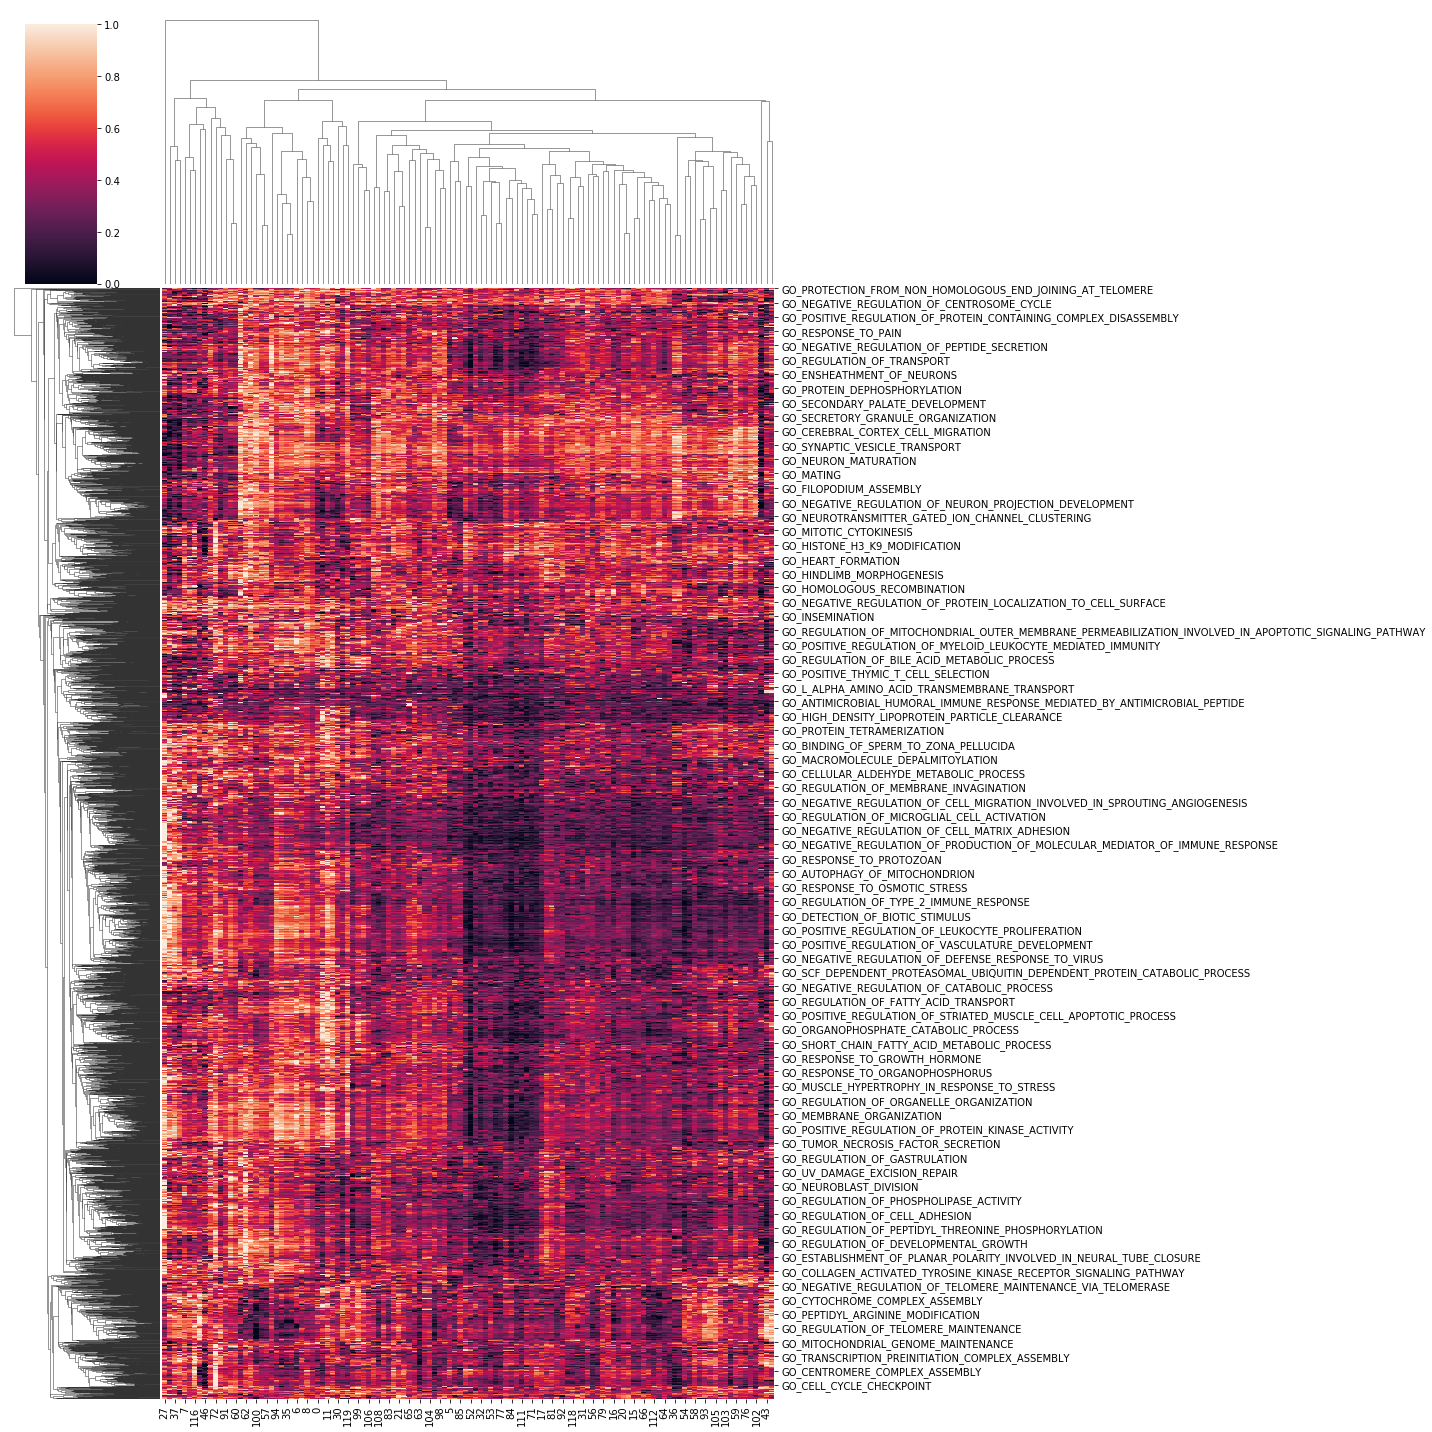

In [346]:
sns.clustermap(go_norm.T, figsize = (20,20))

In [26]:
hallmark_sig= pd.read_csv('./arc_space/Bulk_hallmarks_50_continuous_All.csv', header=0)
hallmark_sig.head()


archetype #                                Feature Name  \
0            1  HALLMARK EPITHELIAL MESENCHYMAL TRANSITION   
1            1          HALLMARK INTERFERON ALPHA RESPONSE   
2            1            HALLMARK TNFA SIGNALING VIA NFKB   
3            1                 HALLMARK TGF BETA SIGNALING   
4            1            HALLMARK IL6 JAK STAT3 SIGNALING   

   P value (Mann-Whitney)  Median Difference  Mean Difference  \
0                0.000132            1.44900          1.37770   
1                0.001448            1.08200          0.89376   
2                0.001389            1.06310          0.95065   
3                0.001448            0.94940          0.70714   
4                0.000870            0.92154          0.76599   

   Significant after Benjamini-Hochberg correction?  Is first bin maximal?  
0                                                 1                      1  
1                                                 1                      1  
2                                                 1                      1  
3                                                 1                      1  
4                                                 1                      1

In [28]:
hallmark_sig_df = hallmark_sig.pivot(index='Feature Name', columns='archetype #', values='P value (Mann-Whitney)')

In [29]:
hallmark_sig_df.columns = ['SCLC-Y','SCLC-P','SCLC-N','SCLC-A2','SCLC-A']

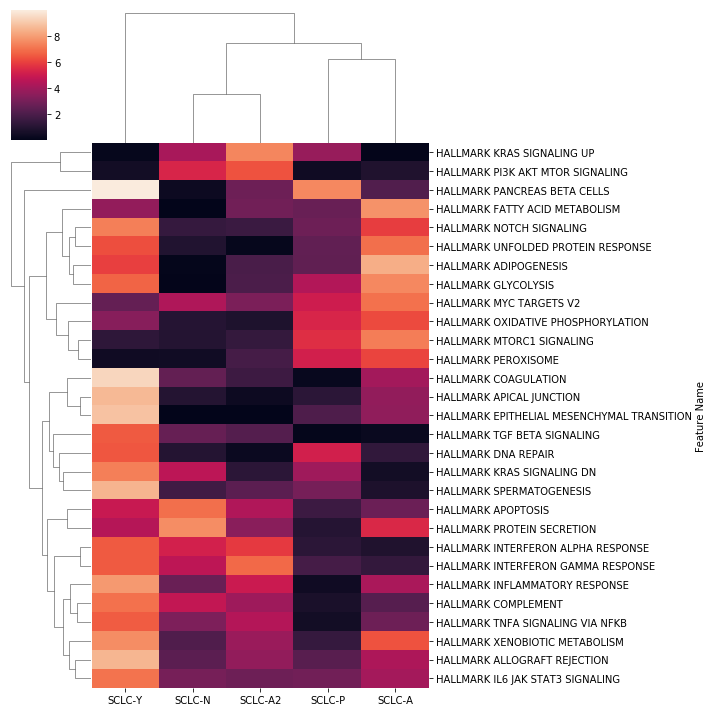

In [47]:
sns.clustermap(-np.log(hallmark_sig_df)[(-np.log(hallmark_sig_df).min(1)>6)])

In [55]:
cancer_hallmark_sig= pd.read_csv('./arc_space/Bulk_hallmarks_continuous_All.csv', header=0)
cancer_hallmark_sig = cancer_hallmark_sig.loc[cancer_hallmark_sig['Mean Difference']>0]
cancer_hallmark_sig


archetype #                        Feature Name  P value (Mann-Whitney)  \
0             1               Inducing Angiogenesis                0.000003   
1             1                Resisting Cell Death                0.000002   
2             1          Evading Immune Destruction                0.000430   
3             1     Genome Instability and Mutation                0.000052   
4             1  Sustaining Proliferative Signaling                0.000048   
5             1          Evading Growth Suppressors                0.000061   
6             1        Tumor-Promoting Inflammation                0.000204   
7             1    Enabling Replicative Immortality                0.000065   
8             1  Activating Invasion and Metastasis                0.000656   
9             1     Reprogramming Energy Metabolism                0.000377   
10            2     Genome Instability and Mutation                0.000541   
11            2     Reprogramming Energy Metabolism                0.002979   
12            2               Inducing Angiogenesis                0.031059   
13            2    Enabling Replicative Immortality                0.608830   
14            2          Evading Immune Destruction                0.082489   
15            2                Resisting Cell Death                0.095625   
16            2        Tumor-Promoting Inflammation                0.283900   
17            2  Sustaining Proliferative Signaling                0.250010   
18            2          Evading Growth Suppressors                0.393710   
24            3     Reprogramming Energy Metabolism                0.684180   
30            4          Evading Immune Destruction                0.000678   
31            4        Tumor-Promoting Inflammation                0.003947   
32            4               Inducing Angiogenesis                0.015203   
33            4                Resisting Cell Death                0.045624   
35            4    Enabling Replicative Immortality                0.677760   
36            4  Activating Invasion and Metastasis                0.454500   
37            4     Reprogramming Energy Metabolism                0.333730   
38            4  Sustaining Proliferative Signaling                0.762810   

    Median Difference  Mean Difference  \
0            0.352770         0.359090   
1            0.289980         0.269270   
2            0.212910         0.203540   
3            0.201380         0.209530   
4            0.201290         0.178920   
5            0.194850         0.184970   
6            0.188330         0.192200   
7            0.183220         0.159240   
8            0.160080         0.149330   
9            0.142850         0.140350   
10           0.191150         0.174460   
11           0.105430         0.113820   
12           0.114440         0.099624   
13           0.076220         0.013270   
14           0.120260         0.057128   
15           0.082346         0.061501   
16           0.069267         0.029406   
17           0.048226         0.038693   
18           0.027121         0.037445   
24          -0.004778         0.011751   
30           0.212930         0.173620   
31           0.182230         0.133980   
32           0.161210         0.095910   
33           0.128540         0.074305   
35           0.048361         0.009721   
36           0.039785         0.029182   
37           0.036472         0.035400   
38           0.028587         0.008875   

    Significant after Benjamini-Hochberg correction?  Is first bin maximal?  
0                                                  1                      1  
1                                                  1                      1  
2                                                  1                      1  
3                                                  1                      1  
4                                                  1                      1  
5                        

In [56]:
cancer_hallmark_sig = cancer_hallmark_sig.pivot(index='Feature Name', columns='archetype #', values='P value (Mann-Whitney)')

In [59]:
cancer_hallmark_sig.columns = ['SCLC-Y','SCLC-P','SCLC-N','SCLC-A2']

In [62]:
cancer_hallmark_sig

SCLC-Y    SCLC-P   SCLC-N   SCLC-A2
Feature Name                                                             
Activating Invasion and Metastasis  0.000656       NaN      NaN  0.454500
Enabling Replicative Immortality    0.000065  0.608830      NaN  0.677760
Evading Growth Suppressors          0.000061  0.393710      NaN       NaN
Evading Immune Destruction          0.000430  0.082489      NaN  0.000678
Genome Instability and Mutation     0.000052  0.000541      NaN       NaN
Inducing Angiogenesis               0.000003  0.031059      NaN  0.015203
Reprogramming Energy Metabolism     0.000377  0.002979  0.68418  0.333730
Resisting Cell Death                0.000002  0.095625      NaN  0.045624
Sustaining Proliferative Signaling  0.000048  0.250010      NaN  0.762810
Tumor-Promoting Inflammation        0.000204  0.283900      NaN  0.003947

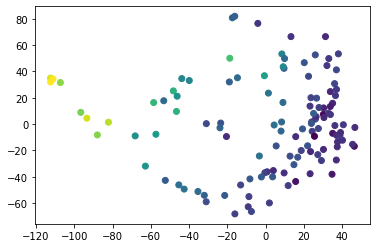

In [64]:
plt.scatter(pcs[0],pcs[1], c = distances['SCLC-Y'], cmap='viridis_r')

In [69]:
hallmark_expr

'HALLMARK_TNFA_SIGNALING_VIA_NFKB'  'HALLMARK_HYPOXIA'  \
0                              2.934432            3.645312   
1                              2.500774            3.933067   
2                              2.702296            4.003144   
3                              2.286375            3.404849   
4                              2.643213            3.814697   
..                                  ...                 ...   
115                            2.324174            3.375072   
116                            2.619069            3.373352   
117                            2.452378            3.571030   
118                            2.600395            3.626046   
119                            3.088345            4.210292   

     'HALLMARK_CHOLESTEROL_HOMEOSTASIS'  'HALLMARK_MITOTIC_SPINDLE'  \
0                              5.017617                    4.511493   
1                              4.673492                    4.732706   
2                              4.862216                    4.787436   
3                              4.611723                    4.721954   
4                              4.755754                    4.415625   
..                                  ...                         ...   
115                            4.453593                    4.616897   
116                            4.420194                    5.012223   
117                            4.508947                    4.755590   
118                            4.564419                    4.367839   
119                            4.778045                    4.585117   

     'HALLMARK_WNT_BETA_CATENIN_SIGNALING'  'HALLMARK_TGF_BETA_SIGNALING'  \
0                                 3.336807                       3.888540   
1                                 3.615168                       4.096003   
2                                 3.589288                       3.987987   
3                                 3.565339                       3.665893   
4                                 3.140211                       3.929492   
..                                     ...                            ...   
115                               3.521406                       3.753643   
116                               3.761688                       4.322753   
117                               3.247118                       4.049960   
118                               3.295720                       3.665247   
119                               3.654110                       4.228493   

     'HALLMARK_IL6_JAK_STAT3_SIGNALING'  'HALLMARK_DNA_REPAIR'  \
0                              2.190798               5.179710   
1                              2.088617               5.056342   
2                              2.151788               5.051927   
3                              1.971366               5.287007   
4                              1.843416               5.299168   
..                                  ...                    ...   
115                            2.045752               5.301158   
116                            2.266435               5.195585   
117                            1.969254               5.157620   
118                            1.876273               5.214404   
119                            2.165845               5.180171   

     'HALLMARK_G2M_CHECKPOINT'  'HALLMARK_APOPTOSIS'  ...  \
0                     5.439689              3.808790  ...   
1                     5.453408              3.730008  ...   
2                     5.469975              3.807439  ...   
3                     5.600016              3.493346  ...   
4                     5.509422              3.643576  ...   
..                         ...                   ...  ...   
115                   5.610325              3.859177  ...   
116                   5.822254              3.678429  ...   
117                   5.484841              3.709933  ...   
118                   5.329714              3.712231  ...   
119   

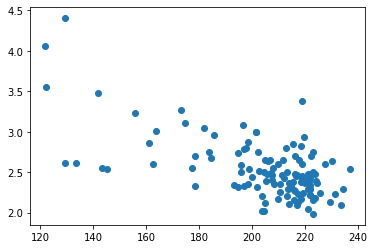

In [74]:
plt.scatter(x = distances['SCLC-Y'], y = hallmark_expr['HALLMARK_TNFA_SIGNALING_VIA_NFKB'])

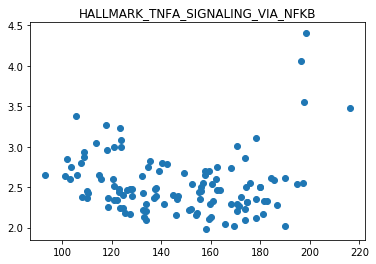

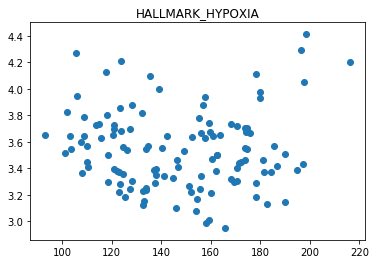

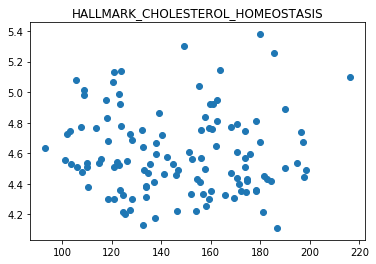

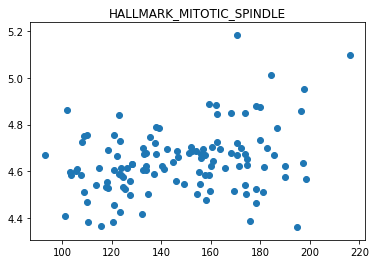

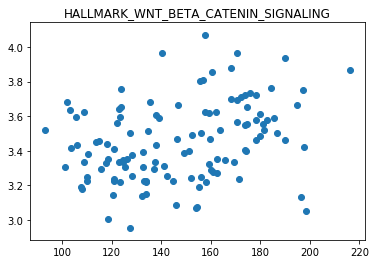

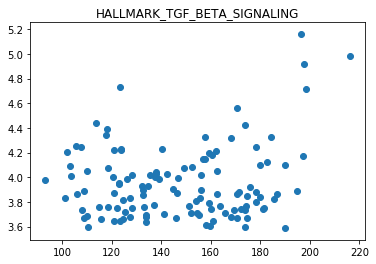

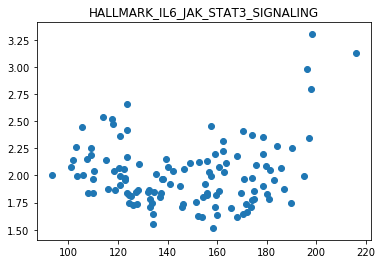

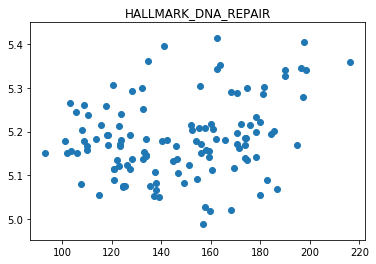

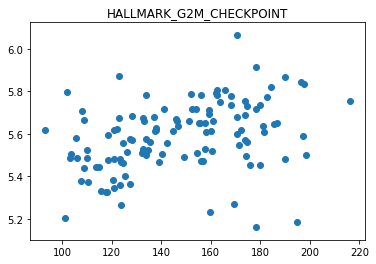

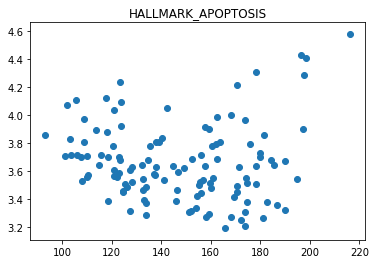

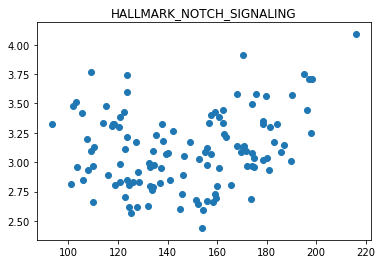

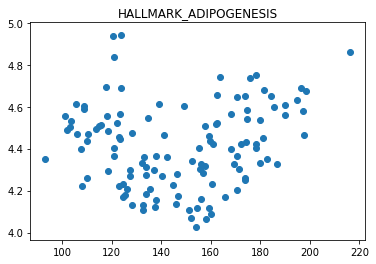

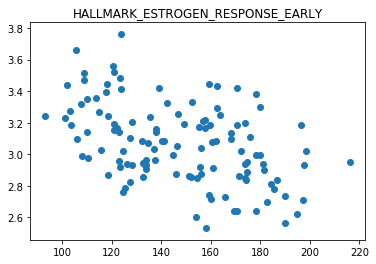

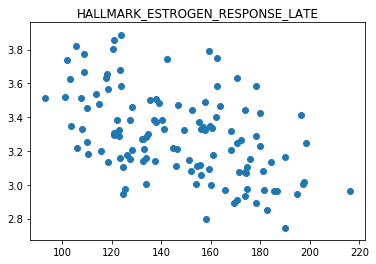

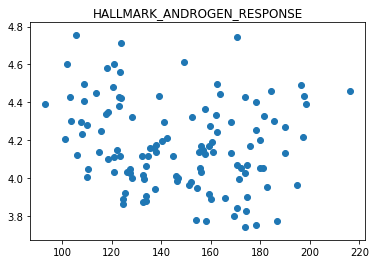

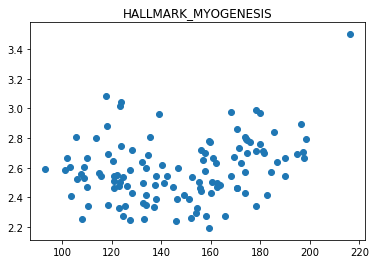

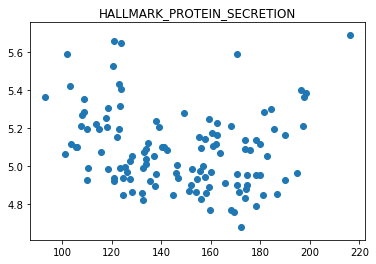

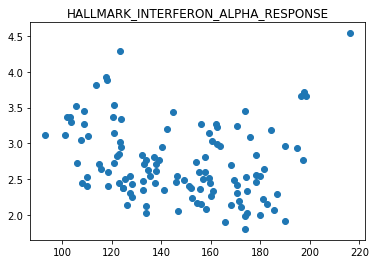

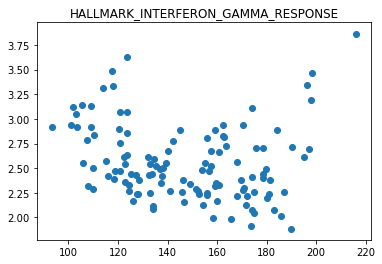

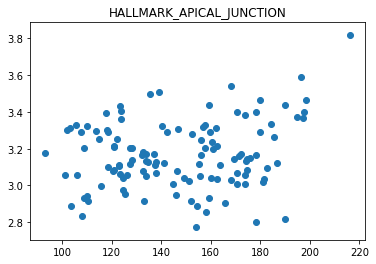

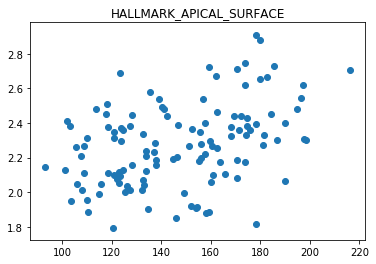

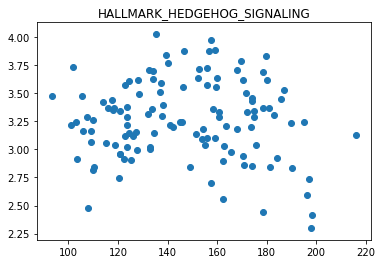

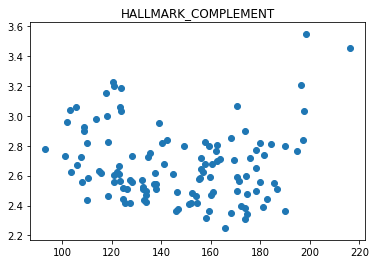

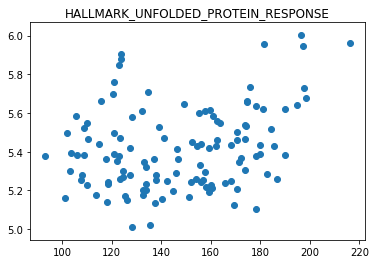

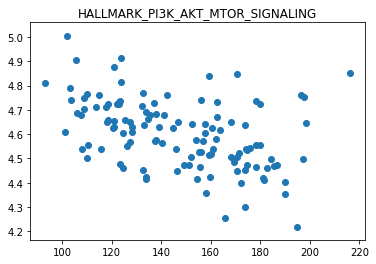

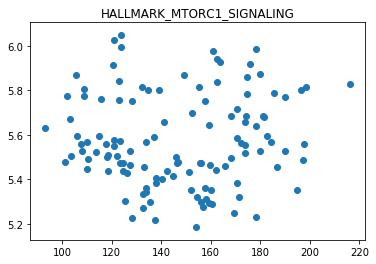

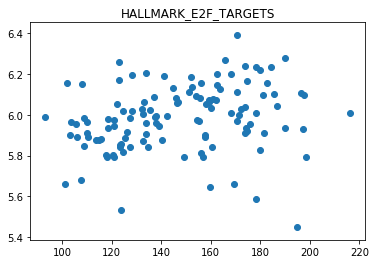

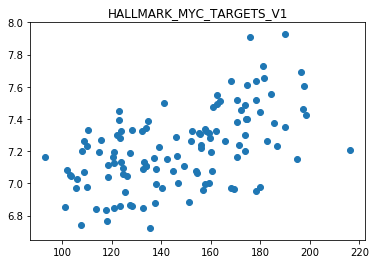

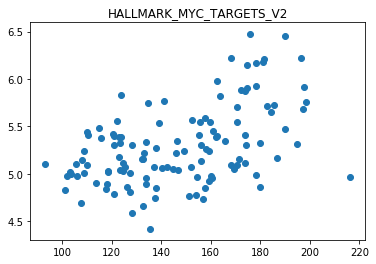

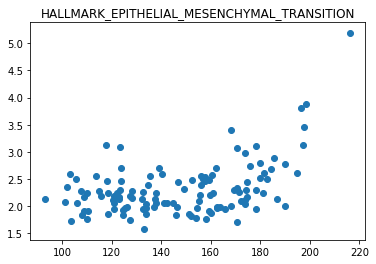

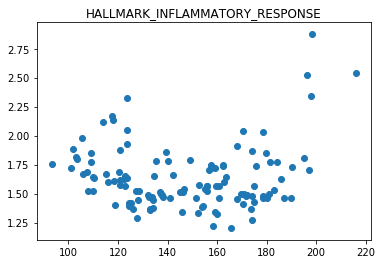

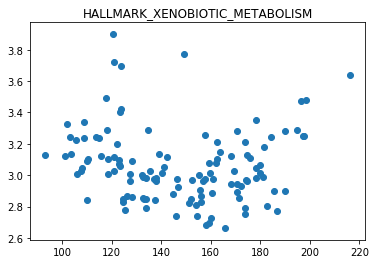

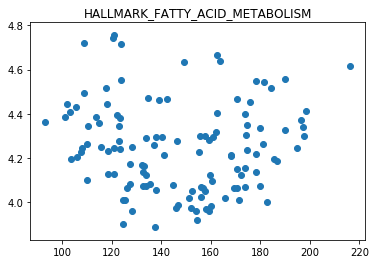

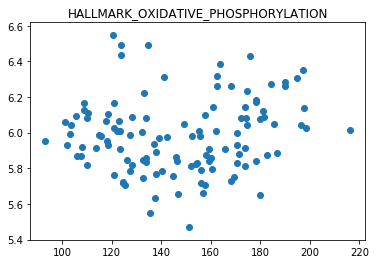

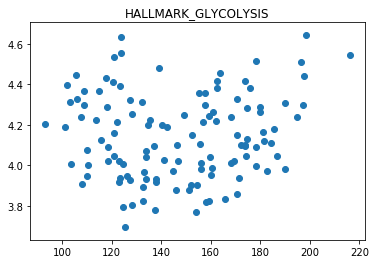

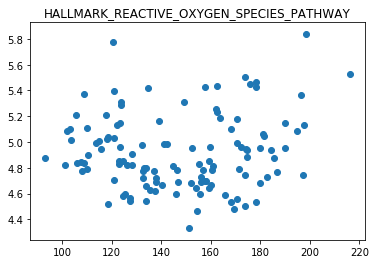

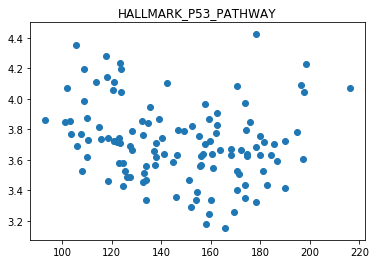

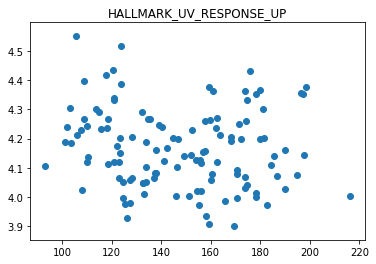

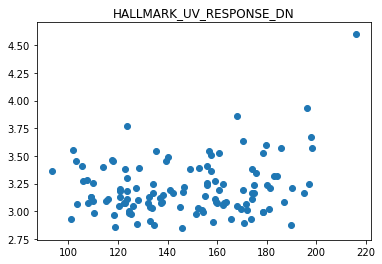

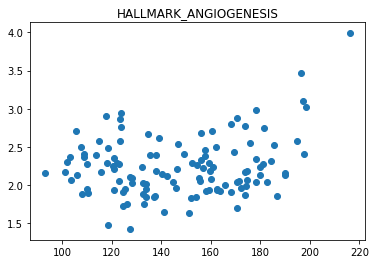

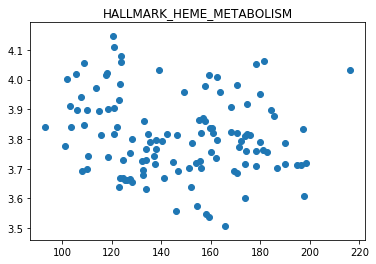

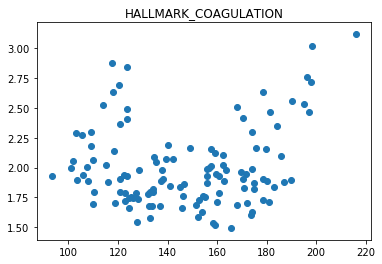

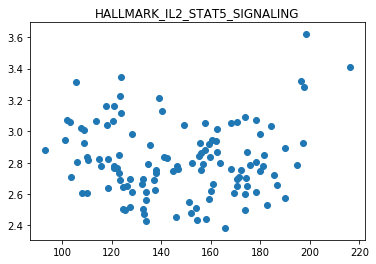

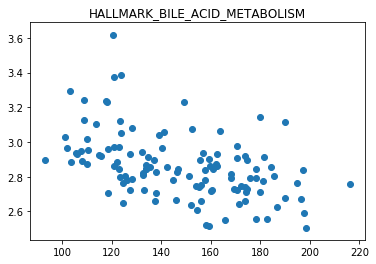

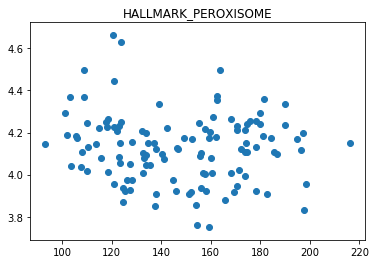

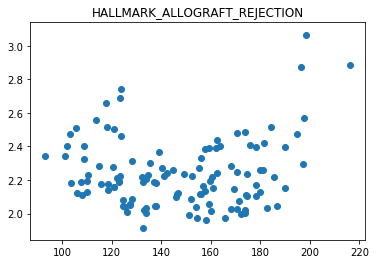

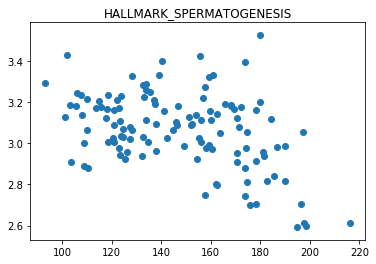

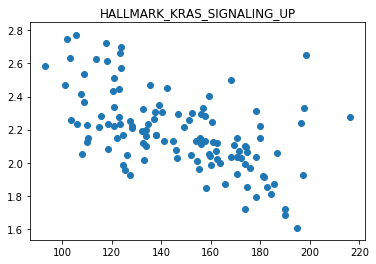

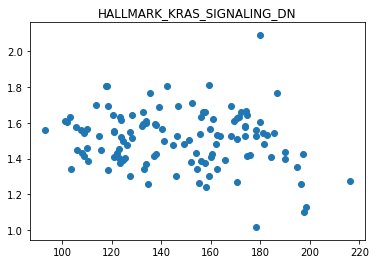

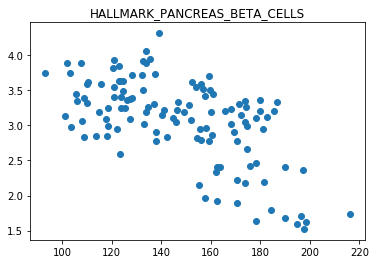

<Figure size 432x288 with 0 Axes>

In [78]:
for i in hallmark_expr:
    plt.scatter(x = distances['SCLC-A2'], y = hallmark_expr[i])
    plt.title(i)
    plt.show()
    plt.clf()

In [80]:
hallmark_expr = pd.read_csv('./arc_space/cancer_hallmarks_expr.csv', header=0, index_col=0)
hallmark_expr

Activating Invasion and Metastasis  \
c.COLO668                            2.816597   
c.CORL24                             3.113756   
c.CORL279                            3.013221   
c.CORL311                            2.682575   
c.CORL47                             2.750171   
...                                       ...   
m.NCIH82                             2.791140   
m.NCIH841                            2.848229   
m.NCIH865                            2.877757   
m.NCIH889                            2.789752   
m.SHP77                              2.915609   

           Enabling Replicative Immortality  Evading Growth Suppressors  \
c.COLO668                          2.803045                    2.999301   
c.CORL24                           3.125881                    3.372271   
c.CORL279                          3.016233                    3.222122   
c.CORL311                          2.721228                    2.976569   
c.CORL47                           2.955743                    3.123135   
...                                     ...                         ...   
m.NCIH82                           2.999248                    3.123662   
m.NCIH841                          3.100288                    3.212152   
m.NCIH865                          3.004707                    3.062410   
m.NCIH889                          2.872994                    3.023827   
m.SHP77                            3.042562                    3.202229   

           Evading Immune Destruction  Genome Instability and Mutation  \
c.COLO668                    2.550213                         3.400991   
c.CORL24                     2.332579                         3.247049   
c.CORL279                    2.357655                         3.366684   
c.CORL311                    2.223798                         3.201471   
c.CORL47                     2.165257                         3.300442   
...                               ...                              ...   
m.NCIH82                     2.233056                         3.450303   
m.NCIH841                    2.363216                         3.526334   
m.NCIH865                    2.327711                         3.208466   
m.NCIH889                    2.123204                         3.395712   
m.SHP77                      2.578263                         3.414570   

           Inducing Angiogenesis  Reprogramming Energy Metabolism  \
c.COLO668               2.327552                         4.002020   
c.CORL24                2.489248                         4.069540   
c.CORL279               2.374578                         4.172441   
c.CORL311               2.059659                         4.029873   
c.CORL47                2.100192                         3.915718   
...                          ...                              ...   
m.NCIH82                2.325576                         4.023000   
m.NCIH841               2.315627                         4.157746   
m.NCIH865               2.237384                         3.992109   
m.NCIH889               2.130656                         3.924191   
m.SHP77                 2.420348                         4.303025   

           Resisting Cell Death  Sustaining Proliferative Signaling  \
c.COLO668              3.113106                            2.885992   
c.CORL24               3.072382                            3.149564   
c.CORL279              3.194103                            3.103624   
c.CORL311              2.895010                            2.793553   
c.CORL47               2.973802                            2.849060   
...                         ...                                 ...   
m.NCIH82               3.030438                            2.923986   
m.NCIH841              3.111083                            3.010734   
m.NCIH865              3.034146                            2.900245   
m.NCIH889              2.971713                            2.850882   
m.SHP77               

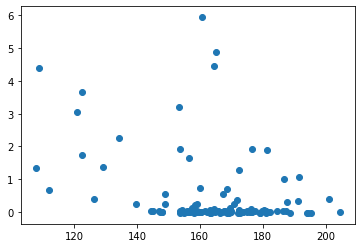

In [21]:

plt.scatter(x = distances['SCLC-P'], y = data['SUCNR1'])


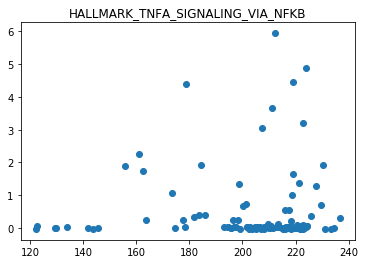

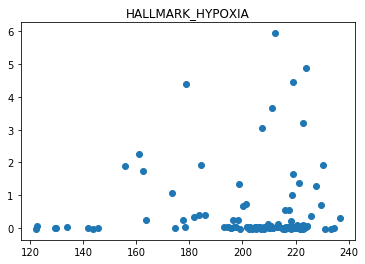

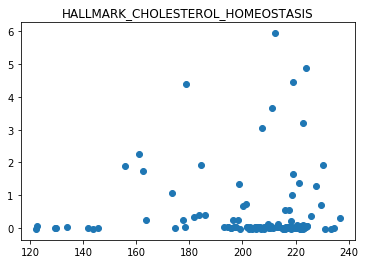

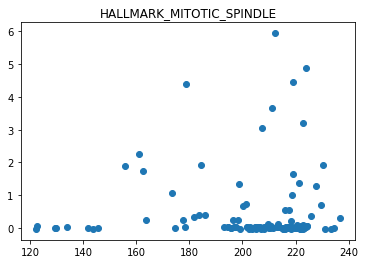

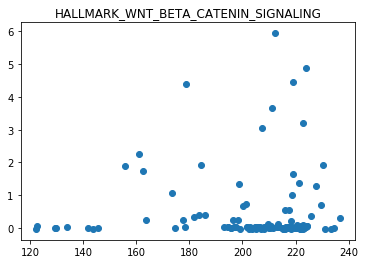

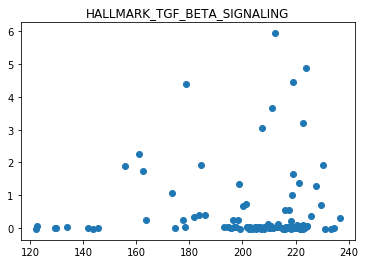

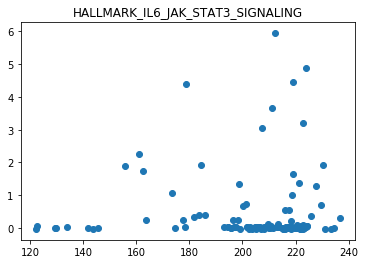

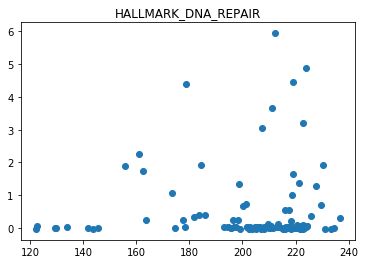

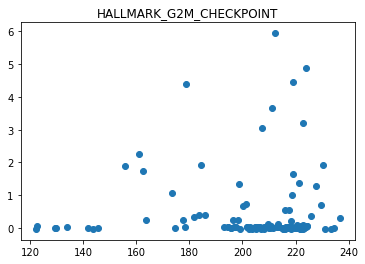

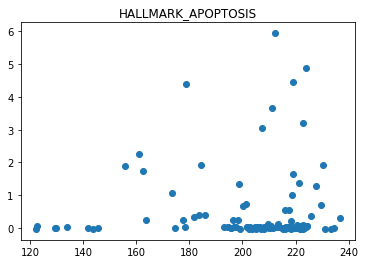

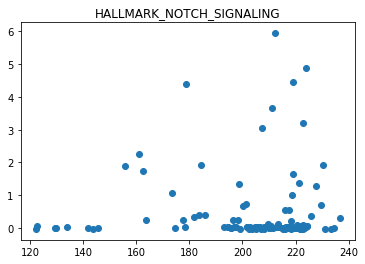

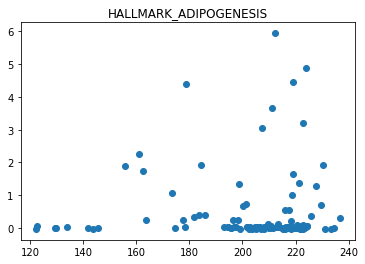

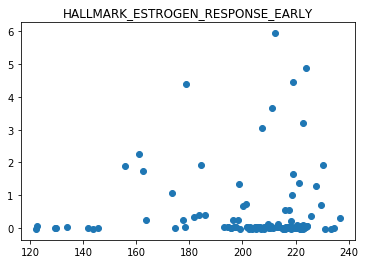

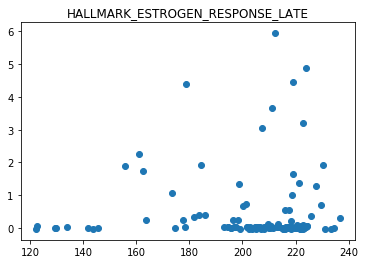

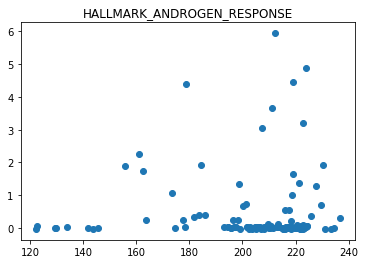

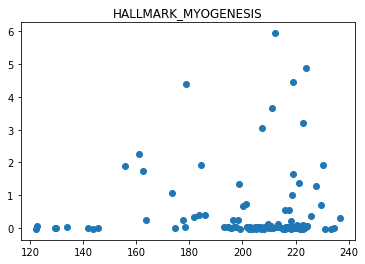

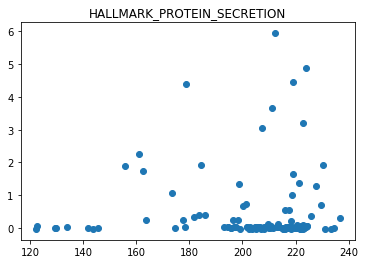

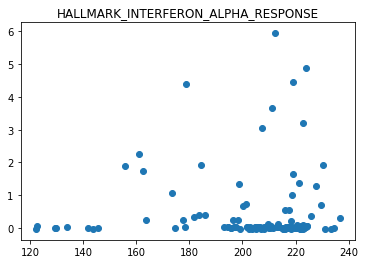

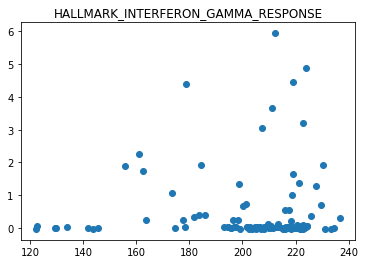

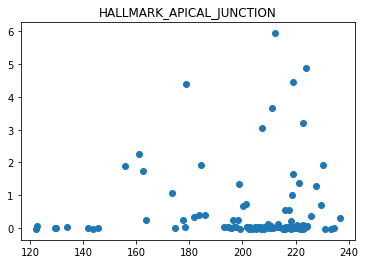

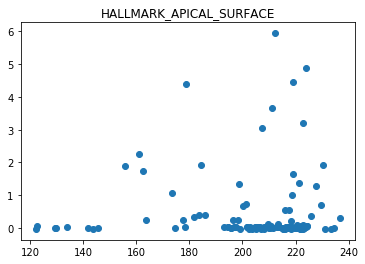

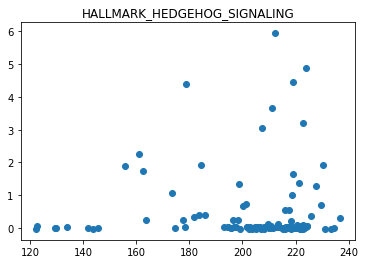

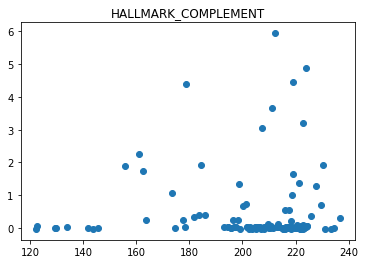

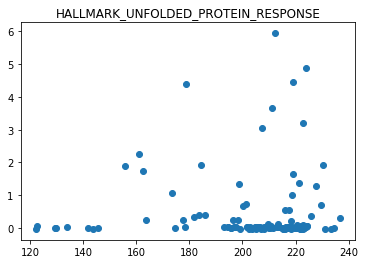

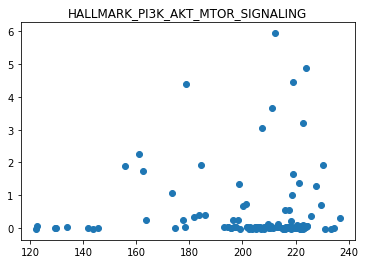

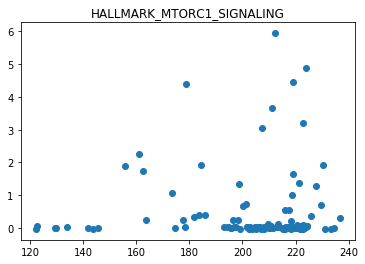

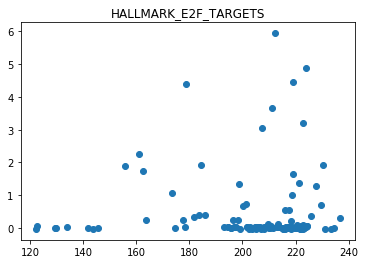

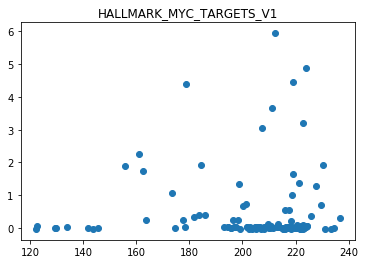

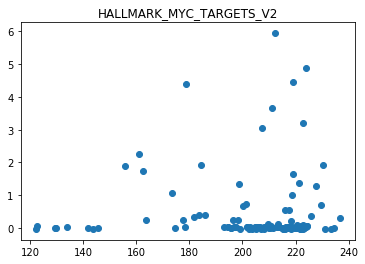

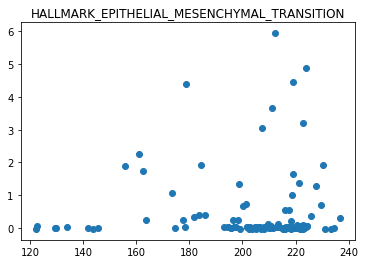

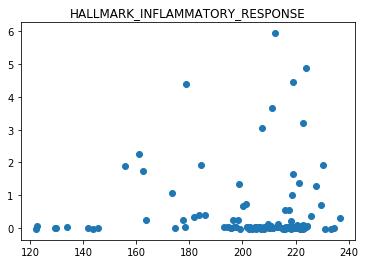

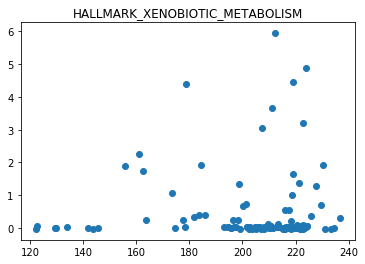

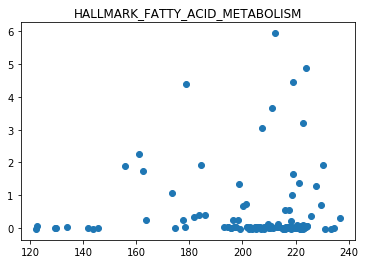

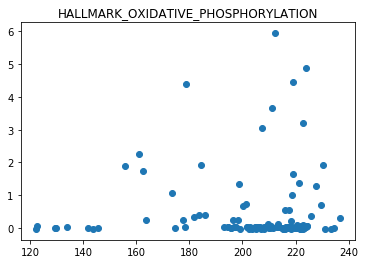

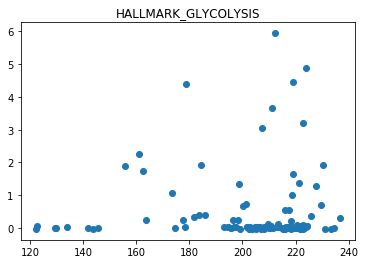

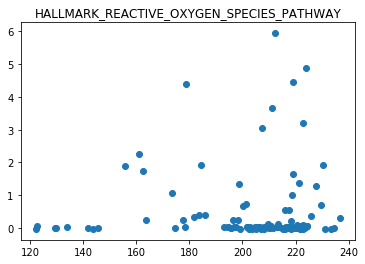

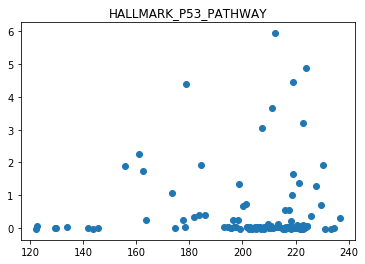

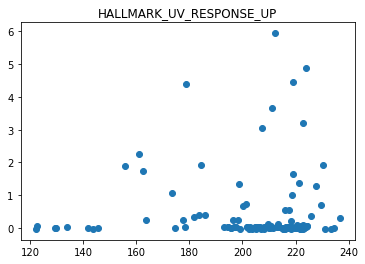

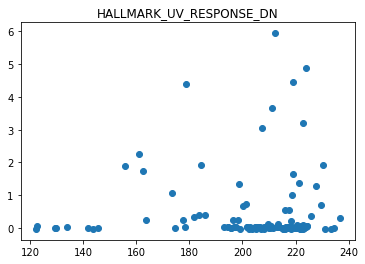

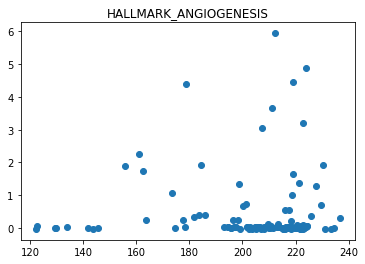

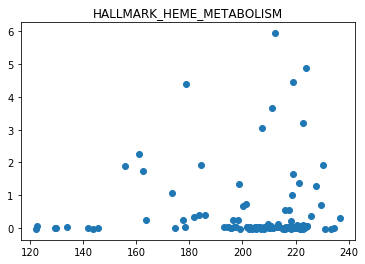

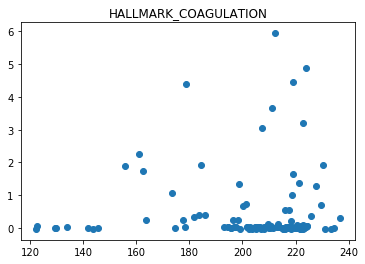

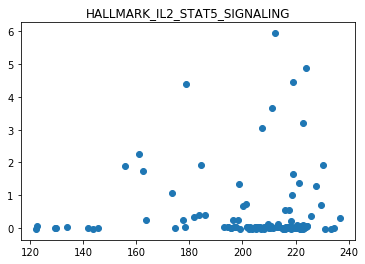

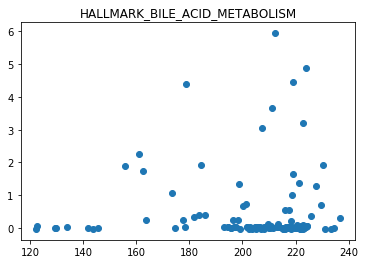

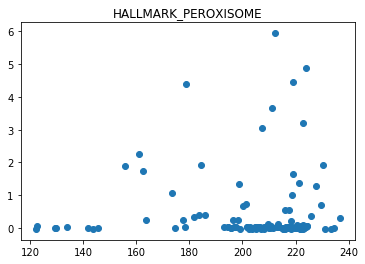

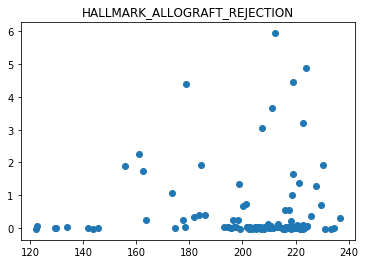

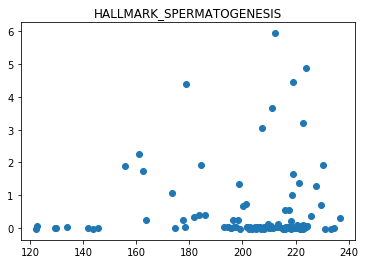

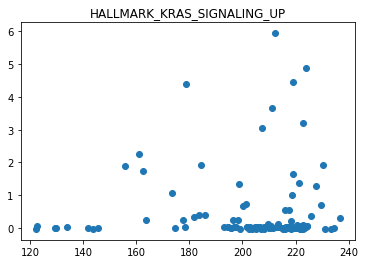

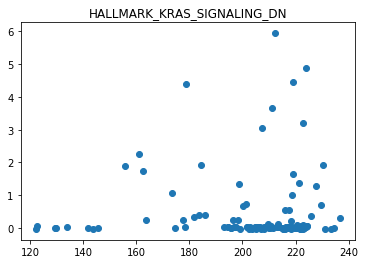

KeyboardInterrupt: 

In [29]:
for i in hallmark_expr:
    plt.scatter(x = distances['SCLC-Y'], y = hallmark_expr[i])
    plt.title(i)
    plt.show()
    plt.clf()

In [ ]:
plt.scatter(pcs[0],pcs[1], c = distances['SCLC-Y'], cmap='viridis_r')

In [41]:
!pip install gprofiler


In [42]:
from gprofiler import gprofiler

In [45]:
gprofiler

<function gprofiler.gprofiler(query, organism='hsapiens', ordered_query=False, significant=True, exclude_iea=False, region_query=False, max_p_value=1.0, max_set_size=0, correction_method='analytical', hier_filtering='none', domain_size='annotated', custom_bg=[], numeric_ns='', no_isects=False, png_fn=None, include_graph=False, src_filter=None)>

In [48]:
go_all = pd.read_csv('./arc_space/c5_continuous_All.csv', header = 0, index_col = None)



In [49]:
go_all

archetype #                                       Feature Name  \
0                1                          GO MEMBRANE RAFT ASSEMBLY   
1                1  GO ANTIGEN PROCESSING AND PRESENTATION OF ENDO...   
2                1                                   GO BLEB ASSEMBLY   
3                1                    GO RESPONSE TO INTERFERON ALPHA   
4                1  GO POSITIVE REGULATION BY SYMBIONT OF ENTRY IN...   
...            ...                                                ...   
26120            5      GO REGULATION OF HORMONE BIOSYNTHETIC PROCESS   
26121            5                         GO RESPONSE TO EPINEPHRINE   
26122            5                                 GO HEART INDUCTION   
26123            5  GO ANTIGEN PROCESSING AND PRESENTATION OF ENDO...   
26124            5  GO ANTIGEN PROCESSING AND PRESENTATION OF ENDO...   

       P value (Mann-Whitney)  Median Difference  Mean Difference  \
0                    0.000084            2.59240          2.29350   
1                    0.000700            1.86510          1.61620   
2                    0.000152            1.80950          1.65200   
3                    0.000145            1.67550          1.48310   
4                    0.000325            1.57450          1.28280   
...                       ...                ...              ...   
26120                0.042464           -0.39244         -0.31896   
26121                0.064555           -0.42539         -0.30409   
26122                0.054786           -0.44985         -0.31392   
26123                0.143470           -0.45376         -0.46622   
26124                0.097790           -0.79585         -0.64033   

       Significant after Benjamini-Hochberg correction?  Is first bin maximal?  
0                                                     1                      1  
1                                                     1                      1  
2                                                     1                      1  
3                                                     1                      1  
4                                                     1                      1  
...                                                 ...                    ...  
26120                                                 0                      0  
26121                                                 0                      0  
26122                                                 0                      0  
26123                                                 0                      0  
26124                                                 0                      0  

[26125 rows x 7 columns]

## MAGINE tables

In [151]:
go_all.sort_values(['Is first bin maximal?','Mean Difference'], ascending = [False, False]).loc[go_all['archetype #']==5]



archetype #                                       Feature Name  \
20900            5                GO FOREBRAIN NEURON FATE COMMITMENT   
20902            5     GO REGULATION OF LONG TERM SYNAPTIC DEPRESSION   
20903            5  GO NEGATIVE REGULATION OF EXCITATORY POSTSYNAP...   
20904            5                    GO CARDIAC CELL FATE COMMITMENT   
20901            5           GO CEREBELLAR GRANULAR LAYER DEVELOPMENT   
...            ...                                                ...   
22286            5  GO REGULATION OF CELL CELL ADHESION MEDIATED B...   
22272            5            GO REGULATION OF PLASMINOGEN ACTIVATION   
22224            5  GO POSITIVE REGULATION BY SYMBIONT OF ENTRY IN...   
26124            5  GO ANTIGEN PROCESSING AND PRESENTATION OF ENDO...   
22288            5                          GO MEMBRANE RAFT ASSEMBLY   

       P value (Mann-Whitney)  Median Difference  Mean Difference  \
20900                0.004748            0.66148          0.77767   
20902                0.004748            0.58625          0.55940   
20903                0.004081            0.56898          0.52536   
20904                0.004929            0.53356          0.49408   
20901                0.006156            0.60869          0.48932   
...                       ...                ...              ...   
22286                0.000731           -0.61238         -0.58704   
22272                0.001389           -0.48301         -0.59850   
22224                0.003781           -0.39769         -0.61472   
26124                0.097790           -0.79585         -0.64033   
22288                0.001277           -0.64486         -0.84096   

       Significant after Benjamini-Hochberg correction?  Is first bin maximal?  
20900                                                 1                      1  
20902                                                 1                      1  
20903                                                 1                      1  
20904                                                 1                      1  
20901                                                 1                      1  
...                                                 ...                    ...  
22286                                                 1                      0  
22272                                                 1                      0  
22224                                                 1                      0  
26124                                                 0                      0  
22288                                                 1                      0  

[5225 rows x 7 columns]

In [148]:
s = "GO Forebrain neuron fate commitment"
s = s.upper()

In [364]:
go_table = go_all.pivot(index = 'Feature Name', columns='archetype #', values = 'Mean Difference')
go_sig = go_all.pivot(index = 'Feature Name', columns='archetype #', values = 'Significant after Benjamini-Hochberg correction?')
go_max = go_all.pivot(index = 'Feature Name', columns='archetype #', values = 'Is first bin maximal?')


In [368]:
MAGINE_archetypes = go_sig*np.sign(go_table)
MAGINE_archetypes.to_csv('./arc_space/MAGINE_archetypes.csv')

In [370]:
MAGINE_sig_max = go_sig*go_max
MAGINE_sig_max.to_csv('./arc_space/MAGINE_sig_max.csv')

In [384]:
gene_all = pd.read_csv('./arc_space/Supplemental Table 5_enriched genes.csv', header = 0, index_col = None)


In [387]:
gene_table = gene_all.pivot(index = 'Feature Name', columns='archetype #', values = 'Mean Difference')
gene_sig = gene_all.pivot(index = 'Feature Name', columns='archetype #', values = 'Significant after Benjamini-Hochberg correction?')
gene_max = gene_all.pivot(index = 'Feature Name', columns='archetype #', values = 'Is first bin maximal?')


In [388]:
MAGINE_archetypes_genes = gene_sig*np.sign(gene_table)
MAGINE_archetypes_genes.to_csv('./arc_space/MAGINE_archetypes_genes.csv')

In [391]:
MAGINE_archetypes

archetype #                                           1    2    3    4    5
Feature Name                                                               
GO 2 OXOGLUTARATE METABOLIC PROCESS                -0.0  1.0  0.0 -0.0 -1.0
GO 3 PHOSPHOADENOSINE 5 PHOSPHOSULFATE METABOLI...  1.0 -0.0 -0.0  0.0 -1.0
GO 3 UTR MEDIATED MRNA DESTABILIZATION              1.0  0.0 -1.0 -0.0 -0.0
GO 3 UTR MEDIATED MRNA STABILIZATION                0.0  0.0  0.0 -0.0 -0.0
GO ACETYL COA BIOSYNTHETIC PROCESS                 -0.0  0.0  0.0  0.0 -1.0
...                                                 ...  ...  ...  ...  ...
GO XENOBIOTIC TRANSPORT                             1.0 -0.0  0.0  0.0 -0.0
GO ZINC ION HOMEOSTASIS                             0.0  1.0 -0.0  1.0 -0.0
GO ZINC ION TRANSPORT                               0.0  0.0  0.0  0.0 -0.0
GO ZYMOGEN ACTIVATION                               1.0  0.0 -0.0  1.0 -1.0
GO ZYMOGEN INHIBITION                               1.0  0.0 -1.0  1.0 -1.0

[5225 rows x 5 columns]

In [370]:
MAGINE_sig_max = go_sig*go_max
MAGINE_sig_max.to_csv('./arc_space/MAGINE_sig_max.csv')

In [155]:
enriched = []
for i in range(5):
    for j in go_table.sort_values(i+1, ascending = False).head(20).index:
        enriched.append(j)



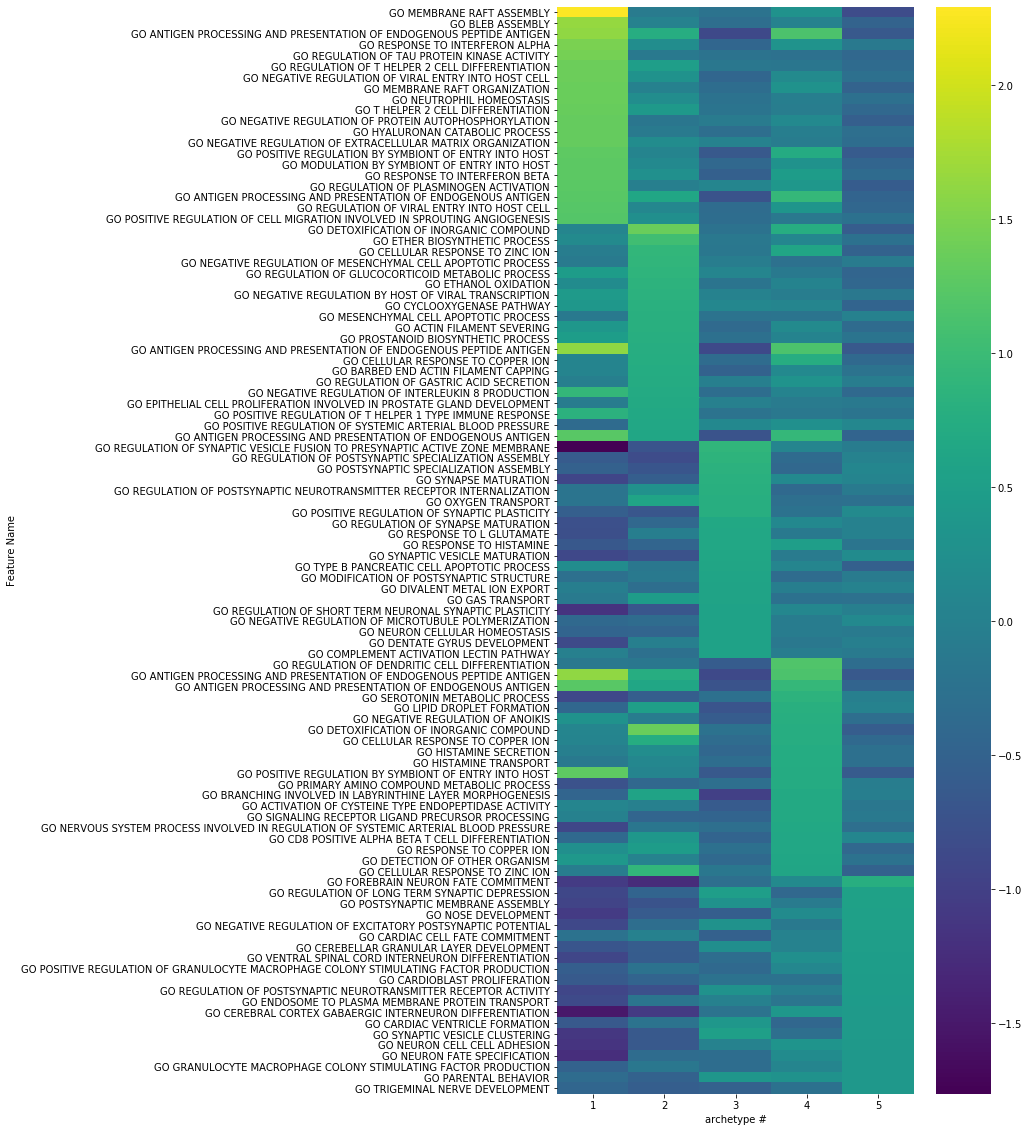

In [161]:
plt.figure(figsize = (8,20))
sns.heatmap(go_table.loc[enriched], cmap="viridis")

In [361]:
go_all

archetype #                                       Feature Name  \
0                1                          GO MEMBRANE RAFT ASSEMBLY   
1                1  GO ANTIGEN PROCESSING AND PRESENTATION OF ENDO...   
2                1                                   GO BLEB ASSEMBLY   
3                1                    GO RESPONSE TO INTERFERON ALPHA   
4                1  GO POSITIVE REGULATION BY SYMBIONT OF ENTRY IN...   
...            ...                                                ...   
26120            5      GO REGULATION OF HORMONE BIOSYNTHETIC PROCESS   
26121            5                         GO RESPONSE TO EPINEPHRINE   
26122            5                                 GO HEART INDUCTION   
26123            5  GO ANTIGEN PROCESSING AND PRESENTATION OF ENDO...   
26124            5  GO ANTIGEN PROCESSING AND PRESENTATION OF ENDO...   

       P value (Mann-Whitney)  Median Difference  Mean Difference  \
0                    0.000084            2.59240          2.29350   
1                    0.000700            1.86510          1.61620   
2                    0.000152            1.80950          1.65200   
3                    0.000145            1.67550          1.48310   
4                    0.000325            1.57450          1.28280   
...                       ...                ...              ...   
26120                0.042464           -0.39244         -0.31896   
26121                0.064555           -0.42539         -0.30409   
26122                0.054786           -0.44985         -0.31392   
26123                0.143470           -0.45376         -0.46622   
26124                0.097790           -0.79585         -0.64033   

       Significant after Benjamini-Hochberg correction?  Is first bin maximal?  
0                                                     1                      1  
1                                                     1                      1  
2                                                     1                      1  
3                                                     1                      1  
4                                                     1                      1  
...                                                 ...                    ...  
26120                                                 0                      0  
26121                                                 0                      0  
26122                                                 0                      0  
26123                                                 0                      0  
26124                                                 0                      0  

[26125 rows x 7 columns]

In [22]:
arc = pd.read_csv(op.join(outdir, 'arc_space/arc_gene_space_no_lowgenes.csv'), header = None)
arc.columns = data.columns
arc = arc.T
pc_loadings = pd.read_csv(op.join(outdir, 'arc_space/pc_loadings.csv'), header = None)
pc_loadings.index = data.columns
arc_pc = pc_loadings.T.dot(arc.sub(data.mean().values, axis = 0))
arc_pc.columns = ['SCLC-Y','SCLC-P','SCLC-N','SCLC-A2','SCLC-A']
arc_pc = arc_pc[sorted(list(arc_pc.columns))]

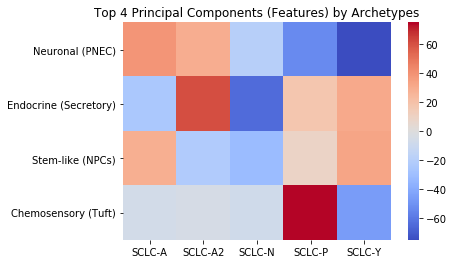

In [23]:
arc_hm = arc_pc.iloc[0:4]
arc_hm.index = ['Neuronal (PNEC)','Endocrine (Secretory)','Stem-like (NPCs)', 'Chemosensory (Tuft)']
sns.heatmap(arc_hm, cmap='coolwarm', vmin = -75, vmax = 75,)
plt.title('Top 4 Principal Components (Features) by Archetypes')
plt.show()

PC1:
- (+) NE (PNECs)
- (-) Non-NE (Mesenchymal)

PC2:
- (+) Endocrine (Secretory)
- (-) Neuronal (Nervous system development)


PC3:
- (+) Stem-like (NPCs) or neural mesenchyme
- (-) Differentiated cell

PC4:
- (+) Chemosensory (tuft)
- (-) Migratory

In [25]:
# pc_loadings.sort_values(2, ascending=False).head(20)
#     print(i)

Archetype space with labels for only cell lines with scRNA-seq (as a side note, PCA from MatLab automatically mean-centers the data before transforming and finding archetypes):

/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


NameError: name 'adata' is not defined

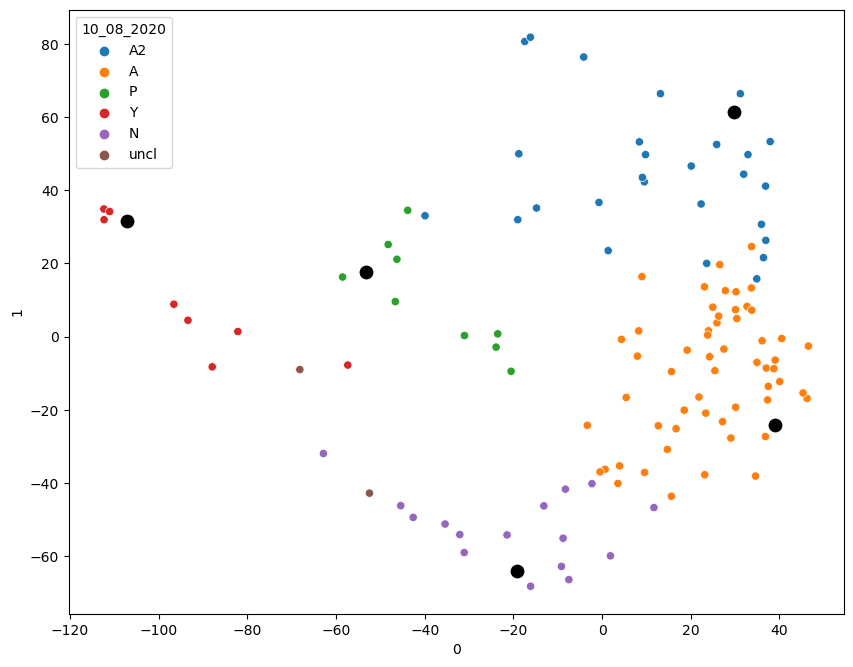

In [27]:
pcs_to_plot = [0,1]
plt.figure(figsize = (10,8), dpi = 100)
sns.scatterplot(pcs[pcs_to_plot[0]],pcs[pcs_to_plot[1]], hue = clines['10_08_2020'])
plt.scatter(arc_pc.iloc[pcs_to_plot[0]],arc_pc.iloc[pcs_to_plot[1]], color = 'black', s = 80)
for (x,y, label) in zip(pcs[pcs_to_plot[0]],pcs[pcs_to_plot[1]],clines.index):
    try:
        if label.split('.')[1] in adata.obs['cline'].cat.categories:
            plt.text(x,y,label)
        elif label.split('.NCI')[1] in adata.obs['cline'].cat.categories:
            plt.text(x,y,label)
    except IndexError: pass


Archetype space with all cell lines labeled, for reference:

/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


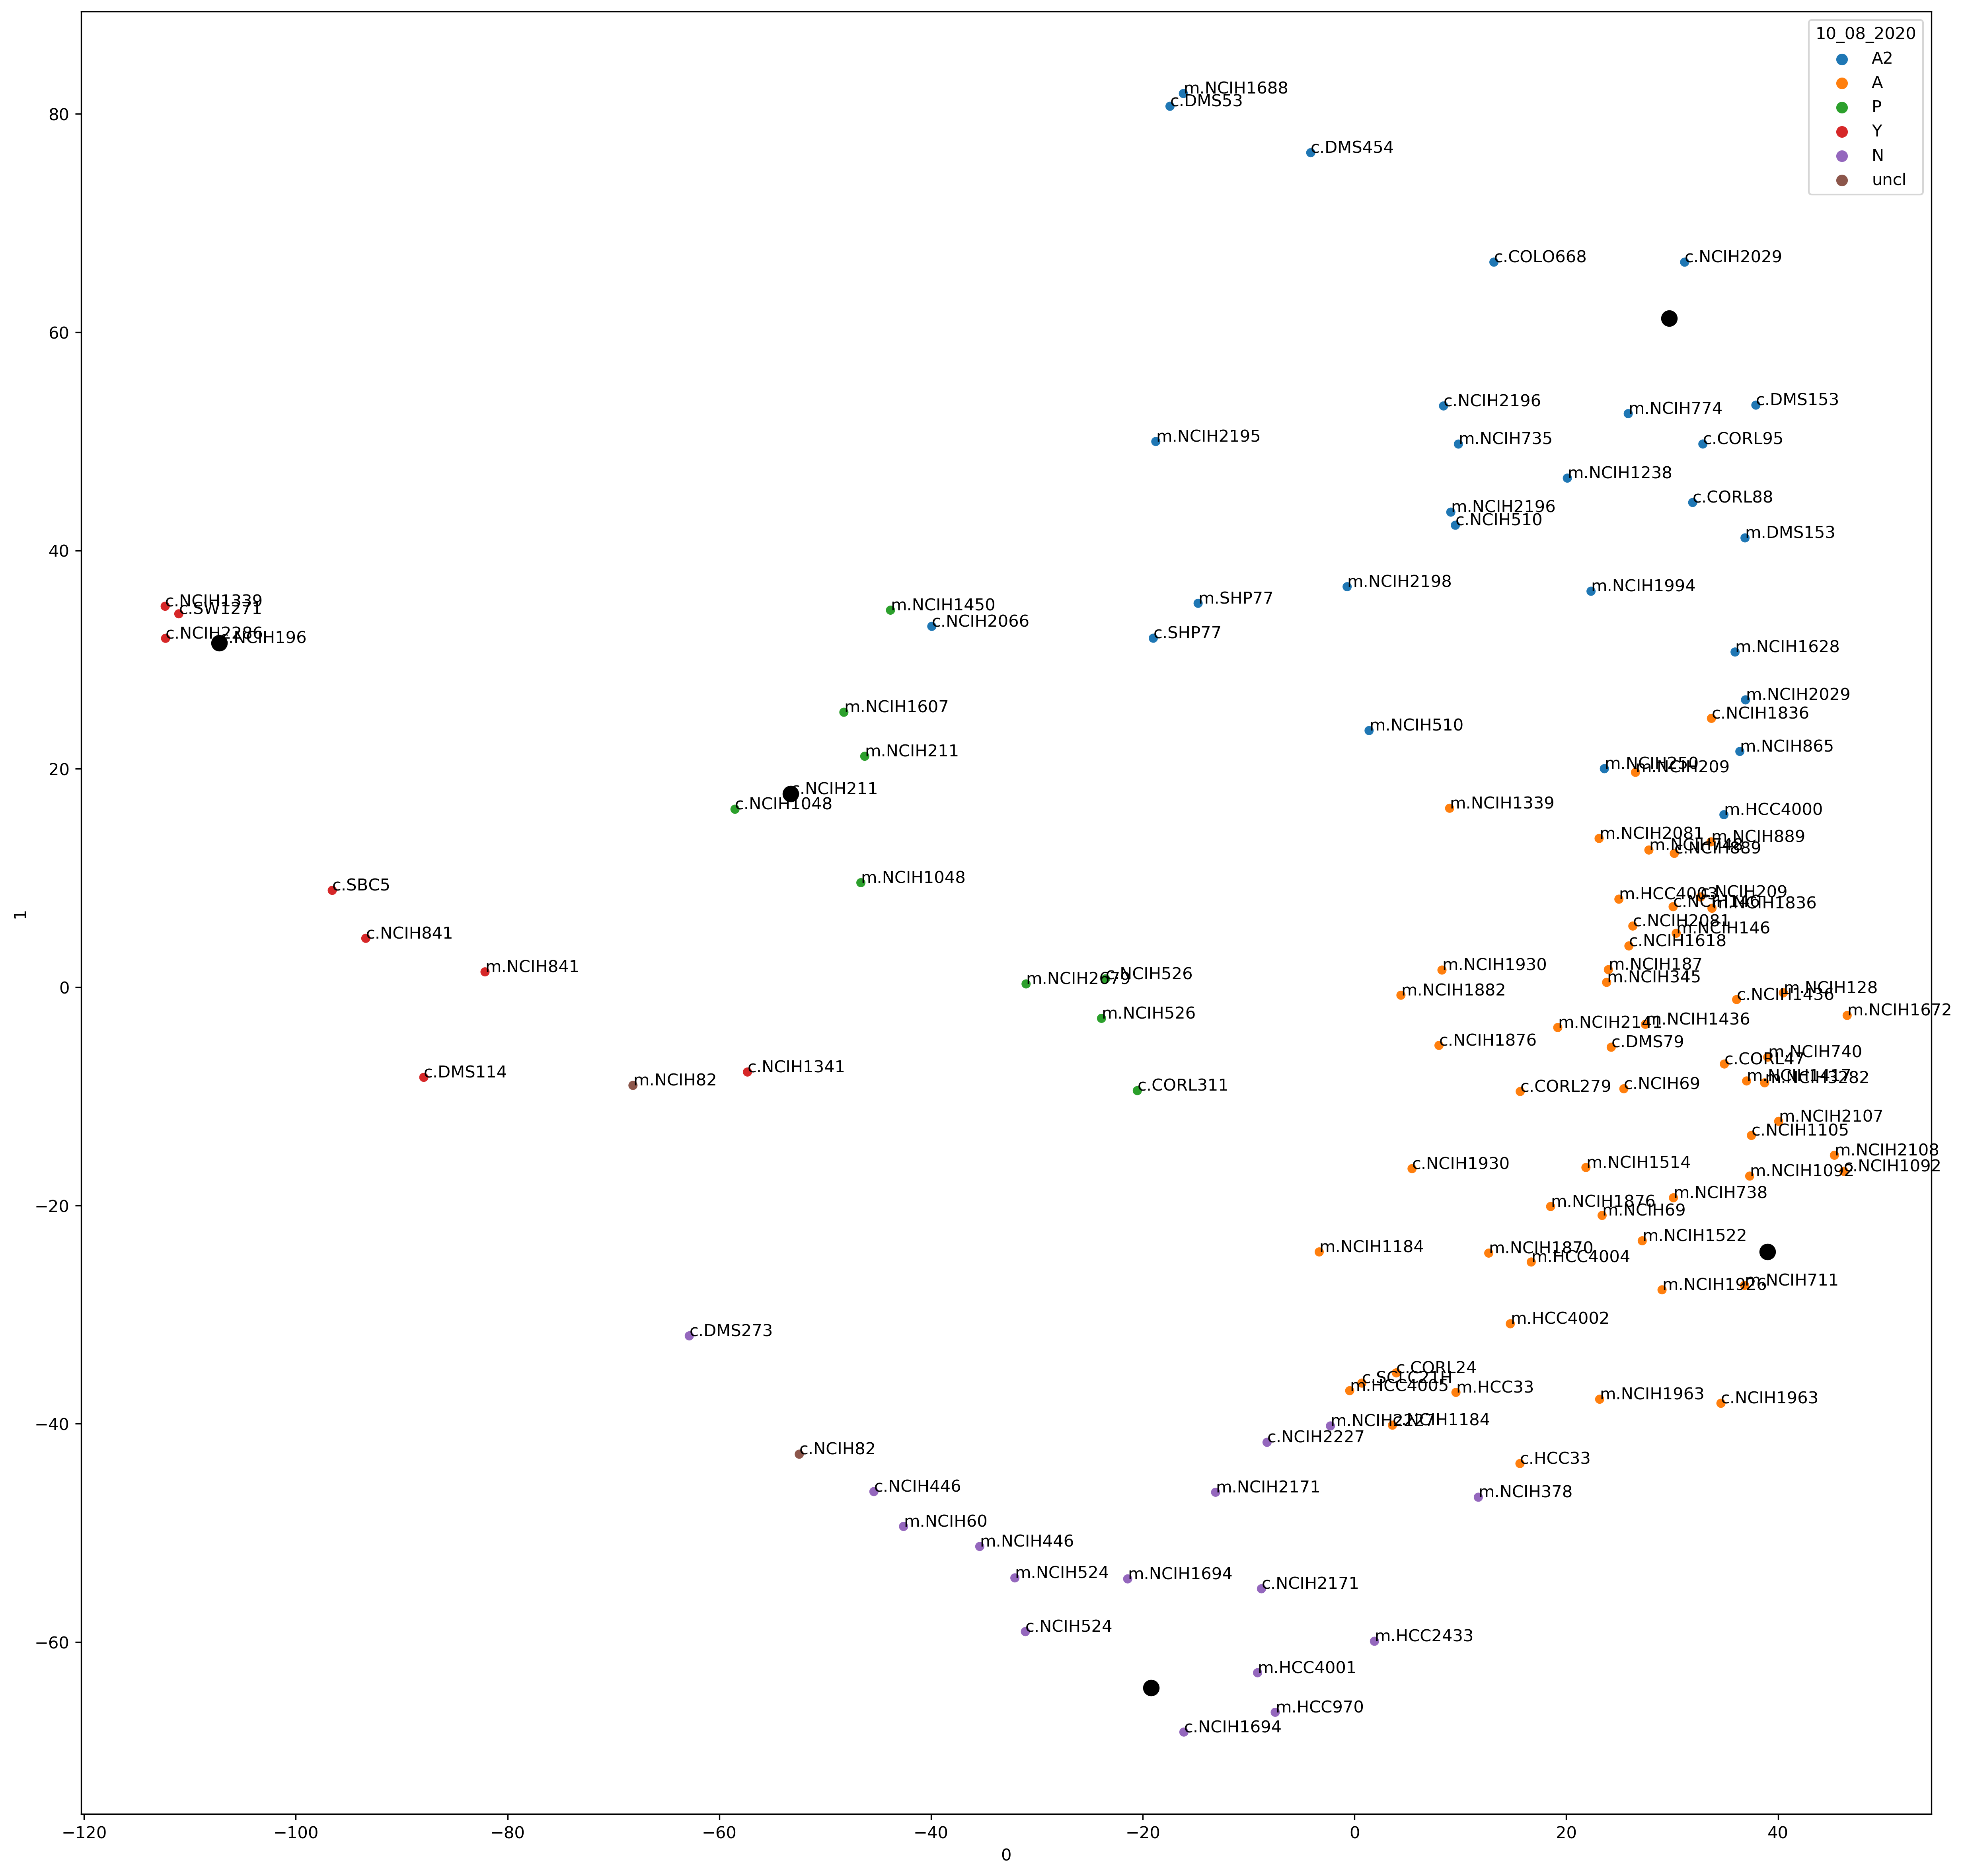

In [32]:
plt.figure(figsize = (20,20), dpi = 300)
sns.scatterplot(pcs[0],pcs[1], hue = clines['10_08_2020'])
plt.scatter(arc_pc.iloc[0],arc_pc.iloc[1], color = 'black', s = 80)
for (x,y, label) in zip(pcs[0],pcs[1],clines.index):
#     if label == "m.NCIH1882":
#     if label.split('.')[1] in ['NCIH82','NCIH446','SBC3','NCIH1688', 'NCIH69','MS-1','NCIH209','NCIH592','SBC5']:
    plt.text(x,y,label)
# plt.savefig('geena_clines.pdf')

... and corresponding scRNA-seq data transformed with the same PCA (after mean-centering the data):

In [89]:
import scanpy as sc
adata = sc.read_h5ad('../../int/clines/adata06.h5ad')

In [94]:
pca.components_

array([[-0.00643782,  0.00188513,  0.01124553, ...,  0.03419873,
        -0.00234952, -0.00238984],
       [ 0.01412707, -0.00602623,  0.00016593, ...,  0.02334308,
         0.00153869, -0.00227161],
       [-0.01573475,  0.00399806, -0.02101701, ..., -0.0193293 ,
         0.00527709,  0.0039464 ],
       [-0.00125483, -0.00602966, -0.00550394, ..., -0.00896056,
         0.00125281,  0.00138803]])

In [90]:
from sklearn import preprocessing as pp
from sklearn.decomposition import PCA
sc_pc_genes = sorted(list(set(adata.var_names).intersection(pc_loadings.index)))
sc_pc_loadings = pc_loadings.loc[sc_pc_genes]
sc_arc_genes = arc.loc[sc_pc_genes]
sc_arc_genes = sc_arc_genes / np.linalg.norm(sc_arc_genes, axis=0)

pca = PCA(n_components=4)
sc_arc_genes_pc = pca.fit_transform(sc_arc_genes.T)

loadings = pd.DataFrame(pca.components_.T,index=sc_pc_genes)

sc_data = data[sc_pc_genes]
adata_df = pd.DataFrame(adata.X.todense(), index=adata.obs_names, columns=adata.var_names)
adata_df = adata_df[sc_pc_genes]
adata_df = adata_df.T
adata_df_scale = adata_df / np.linalg.norm(adata_df, axis=0)
# pd.DataFrame(pp.scale(adata_df.T), columns = sc_pc_genes).T
adata_arc = loadings.T.dot(adata_df_scale)


In [91]:
sc_arc_genes_pc = pd.DataFrame(sc_arc_genes_pc.T)

/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


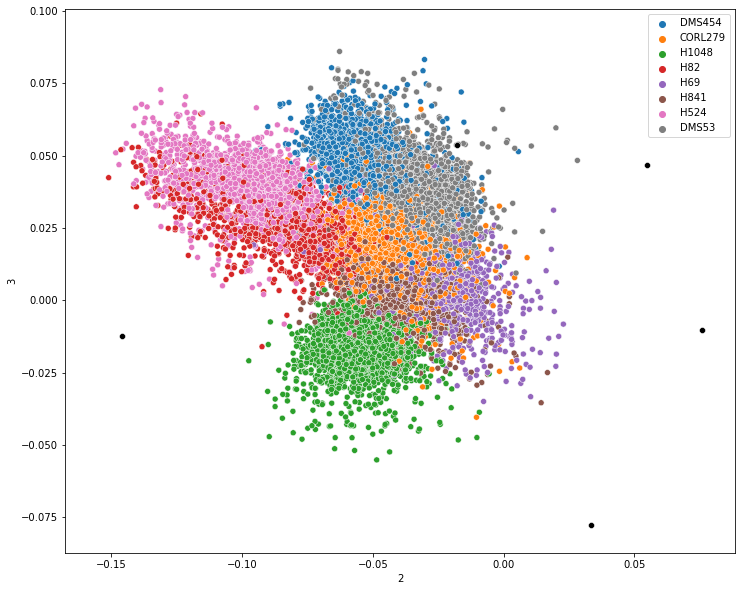

In [92]:
plt.figure(figsize = (12,10))
sns.scatterplot(-adata_arc.loc[pcs_to_plot[0]],-adata_arc.loc[pcs_to_plot[1]], hue = adata.obs['cline'].values)
sns.scatterplot(-sc_arc_genes_pc.loc[pcs_to_plot[0]],-sc_arc_genes_pc.loc[pcs_to_plot[1]], color = 'black')


In [93]:
sc_PCs = pd.DataFrame(adata.varm['PCs'],index = adata.var_names)


In [110]:
adata_pca = sc_PCs.loc[sc_pc_genes]
adata_pca.columns = [str(i)+"sc" for i in adata_pca.columns]

In [114]:
adata_pca[['0sc','1sc','2sc','3sc']]

0sc       1sc       2sc       3sc
index                                         
A1BG    0.000006  0.000007  0.000065  0.000138
A1CF    0.002128  0.000190 -0.001649 -0.001947
A4GALT  0.000263 -0.000077  0.000988  0.000992
AAAS   -0.001267  0.002492  0.002008 -0.000270
AACS    0.011971  0.000819 -0.004946 -0.004535
...          ...       ...       ...       ...
ZYG11A  0.000064 -0.000128 -0.000520  0.000762
ZYG11B  0.000026 -0.000255 -0.003496  0.003707
ZYX     0.000598 -0.008414  0.027119  0.021285
ZZEF1  -0.000095 -0.000118 -0.000352 -0.000060
ZZZ3    0.002814 -0.002181 -0.002231  0.001593

[13113 rows x 4 columns]

In [168]:

# cm = sns.light_palette("green", as_cmap=True)
df =pd.concat([sc_pc_loadings[[0,1,2,3,4]],adata_pca[['0sc','1sc','2sc','3sc']]], axis = 1).corr(method="spearman")
s = np.abs(df).style.background_gradient(cmap='viridis_r')

s

In [169]:
arc

0         1         2         3         4
A1BG    3.639489  1.927857  4.448826  3.321331  4.151298
A1CF    0.218535  0.690655  0.011054  0.600117 -0.178952
A2M     0.915044  0.403488  0.262599  0.418040  0.058488
A2ML1   0.145542  0.073408  0.025584  0.033519  0.096227
A4GALT  3.311321  0.334271  1.159494  1.775815  0.996153
...          ...       ...       ...       ...       ...
ZYG11A  2.691283  1.472013  1.617559  1.046140  1.468553
ZYG11B  3.441079  2.945174  3.714482  3.463426  4.023066
ZYX     7.904851  2.738392  4.348194  1.877991  2.054564
ZZEF1   3.049708  3.648630  3.534607  3.240668  3.453030
ZZZ3    4.461741  5.026690  4.650654  4.899819  4.806817

[15950 rows x 5 columns]

/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


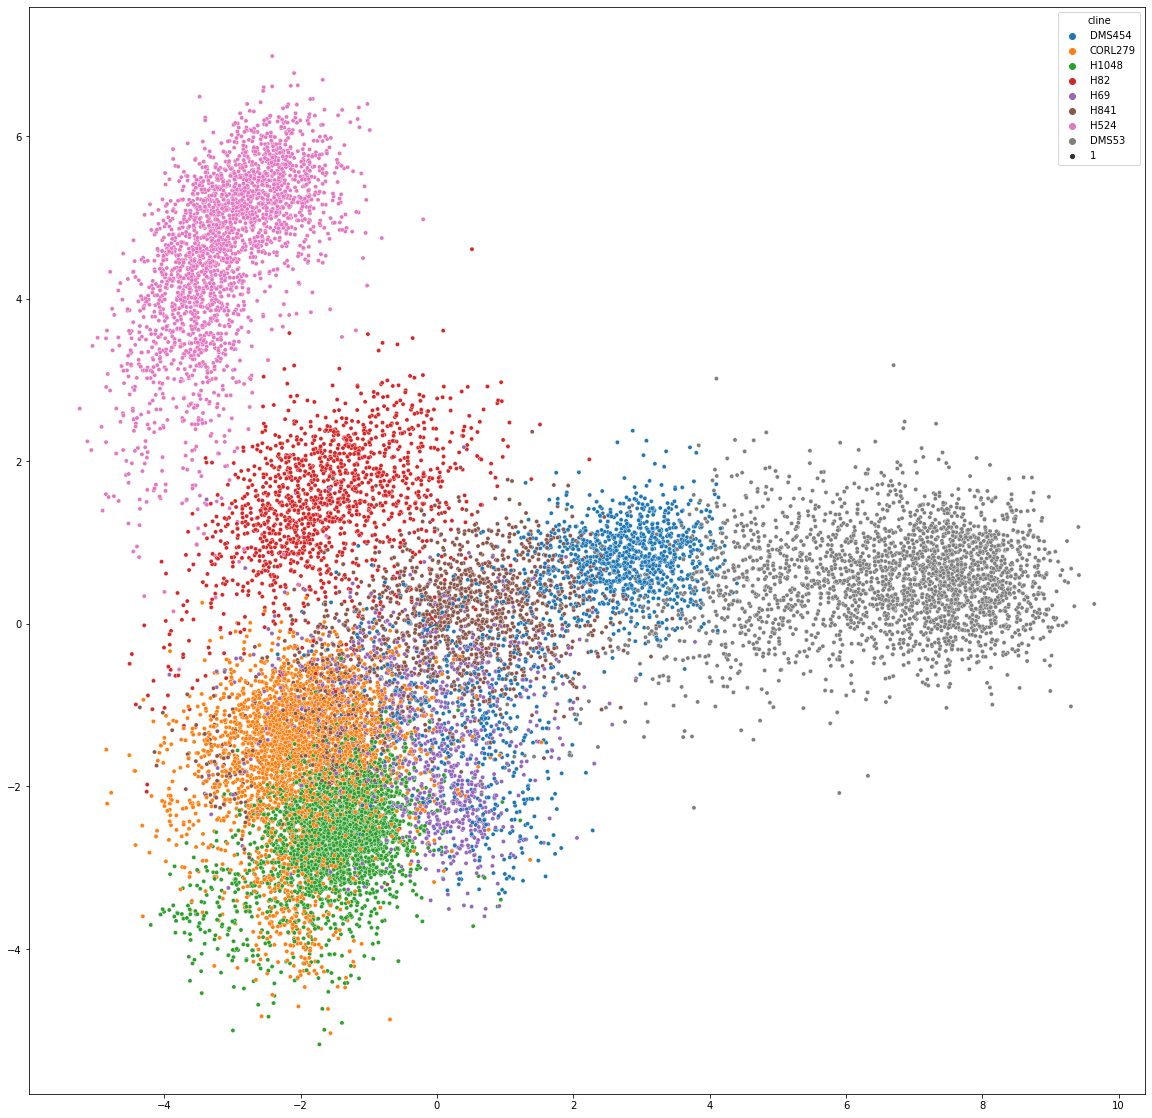

In [171]:
plt.figure(figsize = (20,20))
x = sc_arc_genes.T.dot(sc_pc_loadings)
for c in x[[0,1,2,3,4]]:
    plt.plot([0,x.iloc[0,c]],[0,x.iloc[1,c]])
sns.scatterplot(adata.obsm['X_pca'].T[0], adata.obsm['X_pca'].T[1], hue=adata.obs['cline'], size=1)


We can see above that the single cell data from the cell lines approximately line up with the bulk RNA-seq data, with Y on the left, P in the middle, A2 at the top, N at the bottom, and A on the right.

Lastly, we'll plot tumor data on the archetype space:

In [135]:
tumors = pd.read_csv('lung_tpm_final.csv', index_col=0, header = 0)
tumors.head()

S00022    S00035    S00050    S00213    S00356    S00472    S00501  \
Gene                                                                           
A1BG    3.971626  2.833514  2.792737  2.961507  2.955939  3.332214  2.889223   
A2M     4.653913  4.763524  5.248839  5.631358  6.150907  5.361458  5.857942   
A2ML1   0.000000  0.000000  0.000000  0.000000  0.000000  0.030815  0.000000   
A4GALT  3.186498  3.394310  2.871253  2.846558  2.216998  3.322920  3.929338   
AAAS    3.908311  3.309278  3.451605  3.151845  3.976601  3.999645  3.620763   

          S00825    S00827    S00829  ...    S02351    S02352    S02353  \
Gene                                  ...                                 
A1BG    3.075778  2.814519  2.267827  ...  3.206683  3.276152  4.133326   
A2M     6.834538  5.650582  5.471909  ...  4.944198  5.936320  5.708024   
A2ML1   0.000000  0.000000  0.000000  ...  0.000000  0.078949  0.000000   
A4GALT  2.689807  2.914458  2.057248  ...  3.434869  3.397004  3.769095   
AAAS    3.354868  3.930432  3.609098  ...  3.972863  3.795622  4.316948   

          S02354    S02360    S02375    S02376    S02378    S02382    S02397  
Gene                                                                          
A1BG    3.503443  3.136499  1.780874  1.561214  2.481569  2.205254  2.176689  
A2M     5.664792  4.711961  5.030952  4.757905  6.426368  5.815585  5.749103  
A2ML1   0.000000  0.000000  0.000000  0.000000  0.037669  0.000000  0.000000  
A4GALT  3.113416  2.863493  3.283889  2.422831  3.732642  3.563277  2.240693  
AAAS    4.141142  4.061237  4.007279  3.398061  3.489976  4.100482  3.743781  

[5 rows x 81 columns]

In [136]:
tumor_pc_genes = sorted(list(set(tumors.index).intersection(pc_loadings.index).intersection(set(adata.var_names))))
tumor_pc_loadings = pc_loadings.loc[tumor_pc_genes]
tumor_data = data[tumor_pc_genes]
tumors = tumors.loc[tumor_pc_genes]
tumors_scale = pd.DataFrame(pp.scale(tumors.T), columns = tumor_pc_genes).T
tumors_arc = tumor_pc_loadings.T.dot(tumors_scale)

In [133]:
from py_pcha import PCHA
XC, S, C, SSE, varexpl = PCHA(np.array(tumors_scale), noc=3, delta=1)
XC_pca = tumor_pc_loadings.T.dot(XC)

/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


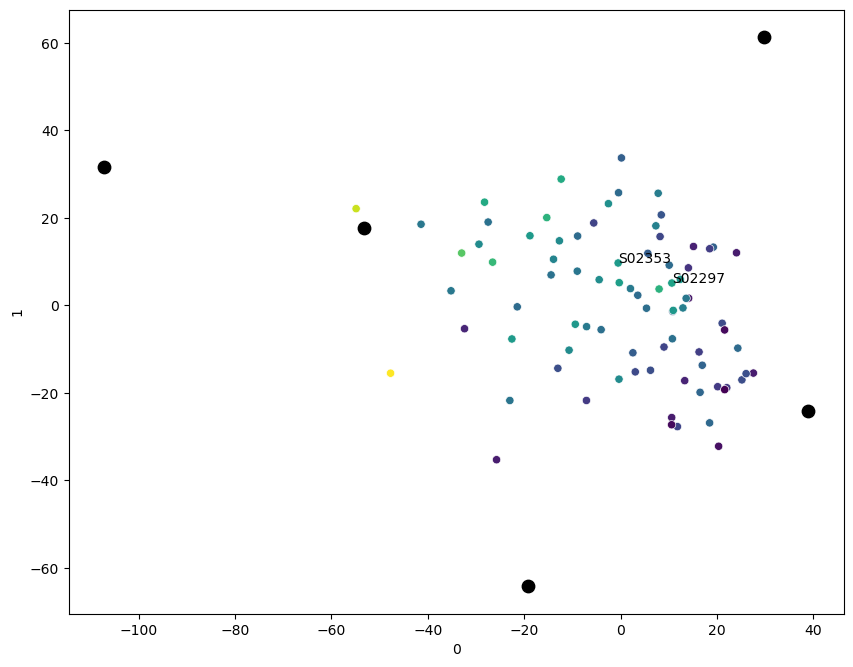

In [92]:
pcs_to_plot = [0,1]
plt.figure(figsize = (10,8), dpi = 100)
# sns.scatterplot(pcs[pcs_to_plot[0]],pcs[pcs_to_plot[1]], hue = clines['10_08_2020'])
plt.scatter(arc_pc.iloc[pcs_to_plot[0]],arc_pc.iloc[pcs_to_plot[1]], color = 'black', s = 80)
# plt.scatter(np.array(XC_pca)[pcs_to_plot[0]],np.array(XC_pca)[pcs_to_plot[1]], color = 'red', s = 80)

sns.scatterplot(tumors_arc.loc[pcs_to_plot[0]],tumors_arc.loc[pcs_to_plot[1]], c = tumors.loc['YAP1'])
for (x,y, label) in zip(tumors_arc.loc[pcs_to_plot[0]],tumors_arc.loc[pcs_to_plot[1]],tumors.columns):
    if label in ['S02353','S02297']: #these two samples = chromothrypsis
        plt.text(x,y,label)



In [856]:
# n_sample = len(pcs.columns)
# total_var = (np.array(data.T)**2).sum(axis = None)/(n_sample-1)
# k = 50
# np.array([(np.array(pcs)[:, i]**2).sum()/(n_sample-1) for i in range(k)]).round(2)


In [857]:
# k = 81
# dx = 1
# X  = np.arange(0, k, dx)
# Y  = np.array([(np.array(tumors_arc)[:, i]**2).sum()/(n_sample-1) for i in range(k)]).round(2)


# # Normalize the data to a proper PDF
# Y /= (dx * Y).sum()

# # Compute the CDF
# CY = np.cumsum(Y * dx)

# # Plot both
# plt.plot(X, Y)
# plt.plot(X, CY, 'r--')


In [95]:
tumor_arc = pd.read_csv('./arc_space/thomas_tumors_arc.csv', index_col = 0, header = None)

In [96]:
tumor_arc

1     2     3     4     5
0                                   
﻿A1BG   2.17  2.44  1.59  2.64  3.69
A2M     2.95  7.39  6.53  4.99  5.59
A2ML1  -0.12  0.10  0.16  0.15  0.06
A4GALT  1.58  3.48  2.53  3.08  2.91
AAAS    2.74  3.52  3.79  4.02  4.41
...      ...   ...   ...   ...   ...
ZYG11A  0.15  1.25  1.41  1.72  2.14
ZYG11B  2.36  3.09  3.12  4.25  3.62
ZYX     1.10  5.23  4.47  3.50  3.96
ZZEF1   0.45  3.05  3.26  3.55  4.13
ZZZ3    3.05  3.64  4.04  4.17  4.27

[15466 rows x 5 columns]

In [110]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
tumors = pd.read_csv('lung_tpm_final.csv', index_col=0, header = 0)

tumor_pca = pca.fit_transform(tumors.T)

In [115]:
tumor_arc_pca = pca.transform(tumor_arc.T)
tumor_arc_pca.shape



(5, 3)

/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


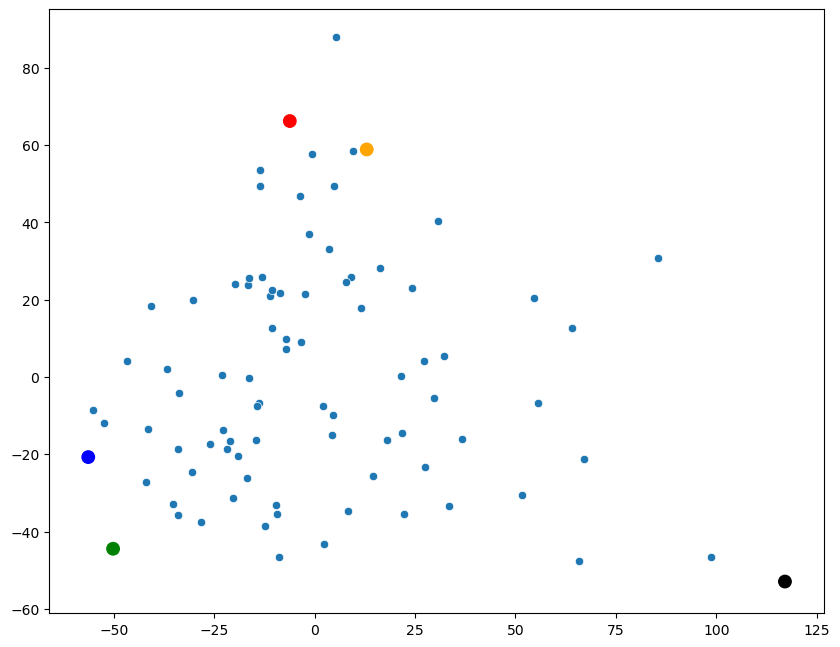

In [309]:
pcs_to_plot = [0,1]
plt.figure(figsize = (10,8), dpi = 100)
sns.scatterplot(tumor_pca[:,pcs_to_plot[0]],tumor_pca[:,pcs_to_plot[1]])
plt.scatter(tumor_arc_pca[:,pcs_to_plot[0]],tumor_arc_pca[:,pcs_to_plot[1]], color = ['black','red','orange','green','blue'], s = 80)


In [170]:
arc_genes = list(set(arc.index).intersection(set(tumor_arc.index)))


In [171]:
all_arc = arc.copy()

In [286]:
all_arc.columns = ['SCLC-Y_cl','SCLC-P_cl','SCLC-N_cl','SCLC-A2_cl','SCLC-A_cl']                         

In [288]:
tumor_arc

1     2     3     4     5
0                                   
﻿A1BG   2.17  2.44  1.59  2.64  3.69
A2M     2.95  7.39  6.53  4.99  5.59
A2ML1  -0.12  0.10  0.16  0.15  0.06
A4GALT  1.58  3.48  2.53  3.08  2.91
AAAS    2.74  3.52  3.79  4.02  4.41
...      ...   ...   ...   ...   ...
ZYG11A  0.15  1.25  1.41  1.72  2.14
ZYG11B  2.36  3.09  3.12  4.25  3.62
ZYX     1.10  5.23  4.47  3.50  3.96
ZZEF1   0.45  3.05  3.26  3.55  4.13
ZZZ3    3.05  3.64  4.04  4.17  4.27

[15466 rows x 5 columns]

In [307]:
all_arc.corr()[['SCLC-Y_cl','SCLC-P_cl','SCLC-N_cl','SCLC-A2_cl','SCLC-A_cl']].iloc[5:]

SCLC-Y_cl  SCLC-P_cl  SCLC-N_cl  SCLC-A2_cl  SCLC-A_cl
1_tumor   0.747379   0.793061   0.795757    0.835110   0.823407
2_tumor   0.722807   0.666645   0.619988    0.699778   0.644458
3_tumor   0.799322   0.792725   0.700021    0.706358   0.690689
4_tumor   0.736953   0.733209   0.812510    0.774726   0.846085
5_tumor   0.738389   0.762520   0.753776    0.837606   0.796289

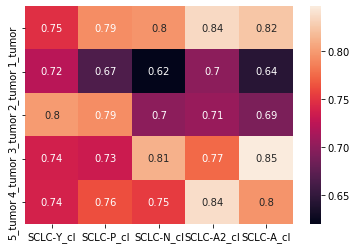

In [310]:
all_arc['1_tumor'] = tumor_arc[1]
all_arc['2_tumor'] = tumor_arc[2]
all_arc['3_tumor'] = tumor_arc[3]
all_arc['4_tumor'] = tumor_arc[4]
all_arc['5_tumor'] = tumor_arc[5]
sns.heatmap(all_arc.corr()[['SCLC-Y_cl','SCLC-P_cl','SCLC-N_cl','SCLC-A2_cl','SCLC-A_cl']].iloc[5:], annot=True)

In [ ]:
all_arc.loc[sig]

# CGRP Elisa data

In [188]:
cgrp_elisa = {'DMS153': 124700,
'DMS53': 35.01,
'H1930': 2939,
'H69': 22.9,
'H446': 55,
'H841': 12.3,
'H524': 75,
'H82': 0}
cgrp_elisa = pd.DataFrame(cgrp_elisa, index = ['cgrp']).T

In [199]:
cgrp_elisa

cgrp
DMS153  124700.00
DMS53       35.01
H1930     2939.00
H69         22.90
H446        55.00
H841        12.30
H524        75.00
H82          0.00

In [200]:
dist = []
for i,r in cgrp_elisa.iterrows():
    dist.append(np.average(distances.loc[[j for j in distances.index if i in j]]['SCLC-A2'].values))

In [201]:
cgrp_elisa['dist'] = dist

In [206]:
cgrp_elisa['log_cgrp'] = np.log1p(cgrp_elisa['cgrp'])

Text(10.049999999999997, 0.5, 'Log1p(CGRP level) \n [pg/10^6 cells]')

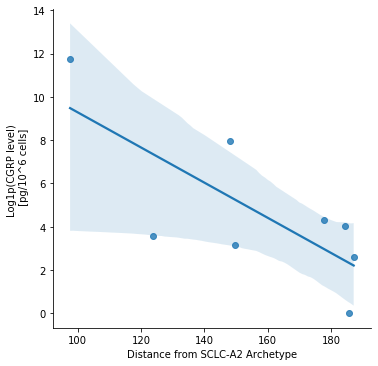

In [214]:
sns.lmplot(data = cgrp_elisa, y = 'log_cgrp', x = 'dist')
plt.xlabel('Distance from SCLC-A2 Archetype')
plt.ylabel('Log1p(CGRP level) \n [pg/10^6 cells]')

# Bulk SCLC Cell Lines vs. TPC signatures

/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


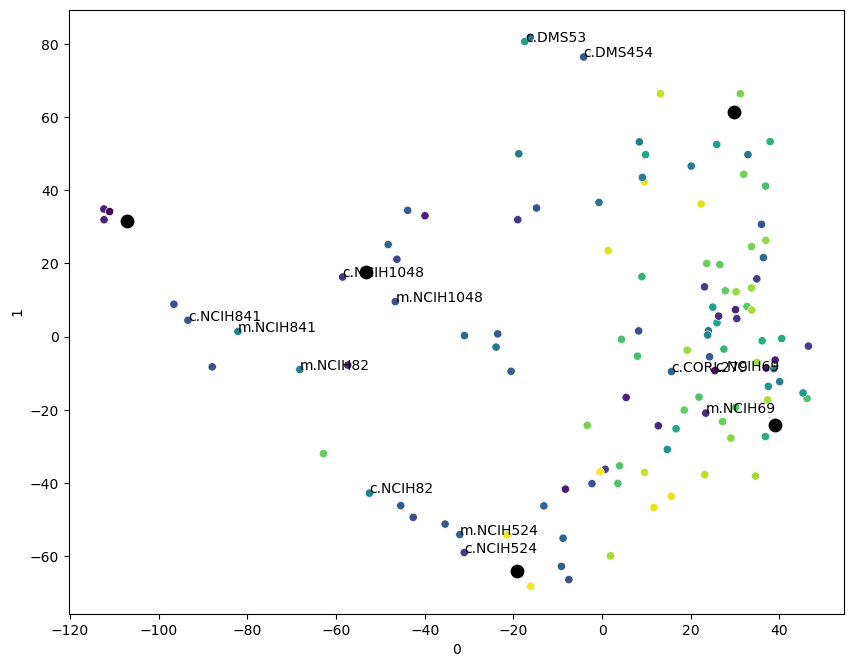

In [233]:
pcs_to_plot = [0,1]
plt.figure(figsize = (10,8), dpi = 100)
sns.scatterplot(pcs[pcs_to_plot[0]],pcs[pcs_to_plot[1]], c = data['MYCL'])
plt.scatter(arc_pc.iloc[pcs_to_plot[0]],arc_pc.iloc[pcs_to_plot[1]], color = 'black', s = 80)
for (x,y, label) in zip(pcs[pcs_to_plot[0]],pcs[pcs_to_plot[1]],clines.index):
    try:
        if label.split('.')[1] in adata.obs['cline'].cat.categories:
            plt.text(x,y,label)
        elif label.split('.NCI')[1] in adata.obs['cline'].cat.categories:
            plt.text(x,y,label)
    except IndexError: pass


## Slithering morphogenesis

In [18]:
axons = pd.read_csv('./data/axon_genes.csv', index_col=None, header = None)

In [19]:
axon_genes = [i.upper() for i in axons[0].values]

In [20]:
axon_expression = data[set(axon_genes).intersection(data.columns)]

**68 genes out of 69 from Yang et al.**

In [36]:
axon_expression = axon_expression.sort_index()

/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


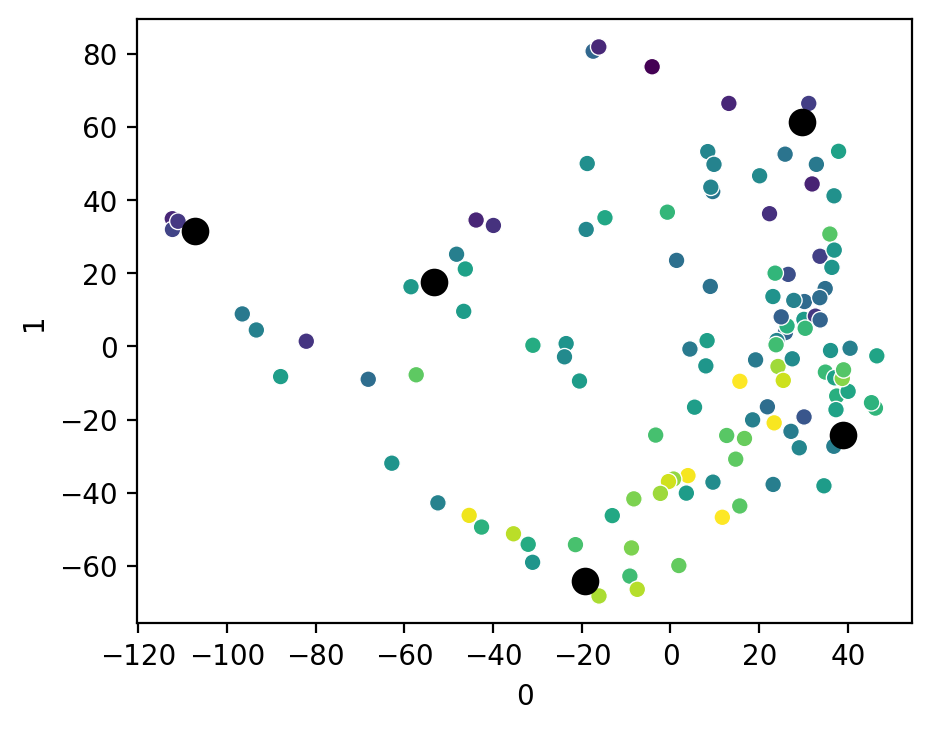

In [40]:
pcs_to_plot = [0,1]
plt.figure(figsize = (5,4), dpi = 200)
sns.scatterplot(pcs[pcs_to_plot[0]],pcs[pcs_to_plot[1]], c = axon_expression.mean(axis = 1))
plt.scatter(arc_pc.iloc[pcs_to_plot[0]],arc_pc.iloc[pcs_to_plot[1]], color = 'black', s = 80)
# for (x,y, label) in zip(pcs[pcs_to_plot[0]],pcs[pcs_to_plot[1]],clines.index):
#     try:
#         if label.split('.')[1] in adata.obs['cline'].cat.categories:
#             plt.text(x,y,label)
#         elif label.split('.NCI')[1] in adata.obs['cline'].cat.categories:
#             plt.text(x,y,label)
#     except IndexError: pass
# plt.title('Axonogenesis Genes from Yang et al.')
plt.savefig('./out/axongenesis_fig.pdf')

In [41]:
ave_axon = pd.DataFrame(axon_expression.mean(axis = 1))

In [42]:
ave_axon = ave_axon.loc[['c.NCIH446','c.NCIH2081','c.NCIH1694','c.NCIH69','c.NCIH82','c.NCIH889','c.NCIH524']]


In [43]:
ave_axon['slithering'] =['high','medium','low','no','no','low','no']


In [44]:
ave_axon['distance_N'] = distances.loc[ave_axon.index]['SCLC-N']

In [45]:
ave_axon.sort_values('distance_N', ascending=True)

0 slithering  distance_N
c.NCIH524   2.827702         no   98.340963
c.NCIH1694  3.458640        low  102.355264
c.NCIH446   3.637795       high  119.028370
c.NCIH82    2.677745         no  127.929577
c.NCIH2081  3.028000     medium  140.690407
c.NCIH889   2.506071        low  152.138876
c.NCIH69    3.551074         no  152.425468

R^2: 0.4303727985647382
R: [[ 1.         -0.65602805]
 [-0.65602805  1.        ]]


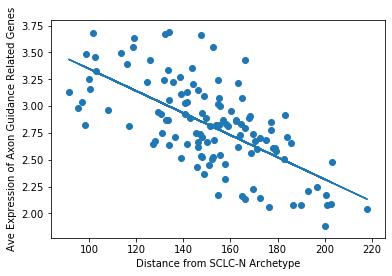

In [47]:
x = distances['SCLC-N']
y = axon_expression.mean(axis = 1)
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)
from sklearn.metrics import r2_score
print("R^2: " + str(r2_score(y, m*x + b)))
print("R: " + str(np.corrcoef(x,y)))
plt.scatter(distances['SCLC-N'],axon_expression.mean(axis = 1))
plt.ylabel("Ave Expression of Axon Guidance Related Genes")
plt.xlabel("Distance from SCLC-N Archetype")
plt.savefig('./out/axonogenesis_scatterplot.pdf')

In [70]:
data_pivot = data.copy()
data_pivot['cline'] = data.index
data_pivot['cluster'] = clines['10_08_2020']
data_pivot = data_pivot.melt(id_vars=['cline','cluster'], value_vars=['MYCL','EPCAM','CD44'])
data_pivot = data_pivot.sort_values('cluster')


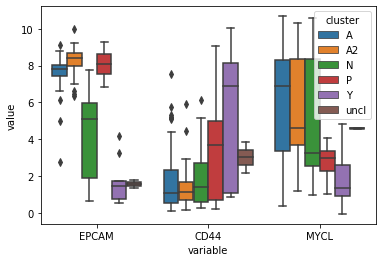

In [71]:
sns.boxplot(data=data_pivot, y='value', hue='cluster', x = 'variable')

In [312]:
axon_expression.columns

Index(['EPHB1', 'EFNA3', 'EPHB2', 'SEMA3A', 'SEMA4D', 'SEMA6B', 'DCK',
       'SEMA5A', 'DBN1', 'SEMA6C', 'EPHA7', 'EPHB6', 'EPHB3', 'ROBO1', 'L1CAM',
       'RELN', 'DCX', 'LRP8', 'ROBO4', 'TUBB3', 'NTN1', 'UNC5A', 'DCC',
       'FSCN1', 'SEMA3C', 'SEMA3G', 'NFASC', 'EFNB1', 'SEMA5B', 'ROBO2',
       'SEMA3E', 'MAPT', 'ROBO3', 'MAP1B', 'CXCR4', 'SEMA3F', 'SEMA7A', 'FEZ1',
       'ALCAM', 'SEMA4F', 'VLDLR', 'EPHA8', 'EPHB4', 'EFNB2', 'SEMA4C',
       'SEMA6A', 'TIAM1', 'DCLK1', 'EFNA1', 'UNC5C', 'GAP43', 'NRP2', 'SLIT1',
       'SEMA4B', 'SLIT2', 'EFNA4', 'NRP1', 'UNC5B', 'SEMA4G', 'SEMA6D',
       'SEMA3D', 'EFNB3', 'SLIT3', 'EPHA4', 'EFNA5', 'EPHA3', 'KIF2A',
       'NCAM1'],
      dtype='object')

R^2: 0.06137704057790727
R: [[ 1.        -0.2477439]
 [-0.2477439  1.       ]]


Text(0.5, 0, 'Distance from SCLC-A Archetype')

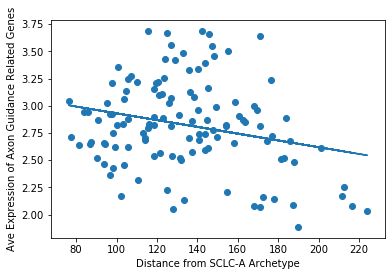

In [252]:
x = distances['SCLC-A']
y = axon_expression.mean(axis = 1)
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)
from sklearn.metrics import r2_score
print("R^2: " + str(r2_score(y, m*x + b)))
print("R: " + str(np.corrcoef(x,y)))
plt.scatter(x,y)
plt.ylabel("Ave Expression of Axon Guidance Related Genes")
plt.xlabel("Distance from SCLC-A Archetype")

/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


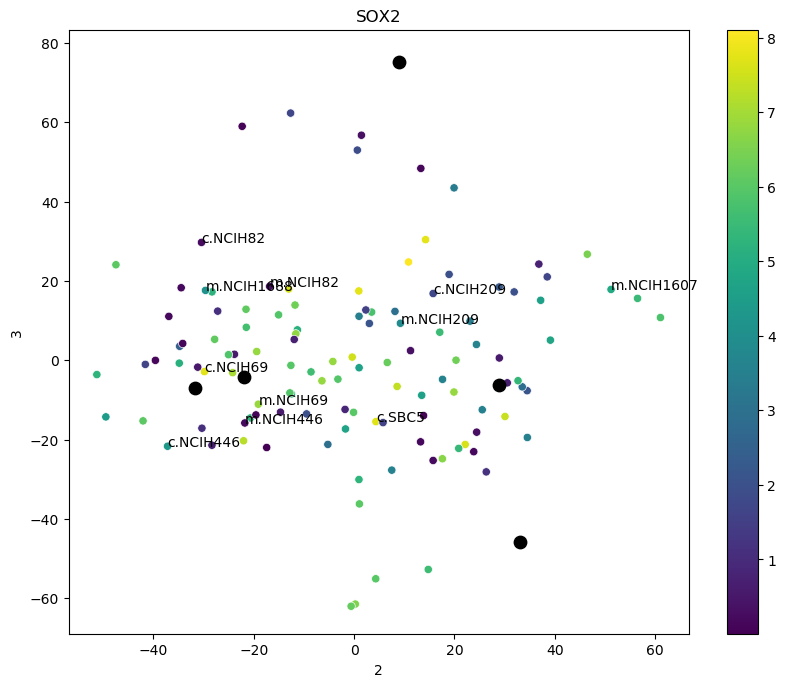

In [72]:
pcs_to_plot = [2,3]
# plt.figure(figsize = (10,8), dpi = 100)
# sns.scatterplot(pcs[pcs_to_plot[0]],pcs[pcs_to_plot[1]], hue = clines['10_08_2020'])
# plt.scatter(arc_pc.iloc[pcs_to_plot[0]],arc_pc.iloc[pcs_to_plot[1]], color = 'black', s = 80)
# plt.show()

def plots(gene):
    plt.figure(figsize = (10,8), dpi = 100)
    
    plot = plt.scatter(pcs[pcs_to_plot[0]],pcs[pcs_to_plot[1]], c=data[gene])
    plt.clf()
    plt.colorbar(plot)
    sns.scatterplot(pcs[pcs_to_plot[0]],pcs[pcs_to_plot[1]], c = data[gene])

    plt.scatter(arc_pc.iloc[pcs_to_plot[0]],arc_pc.iloc[pcs_to_plot[1]], color = 'black', s = 80)
    plt.title(gene)
#     plt.show()
    for (x,y, label) in zip(pcs[pcs_to_plot[0]],pcs[pcs_to_plot[1]],clines.index):
    #     if label == "m.NCIH1882":
        if label.split('.')[1] in ['NCIH82','NCIH446','SBC3','NCIH1688', 'NCIH69','MS-1','NCIH209','NCIH592','SBC5', 'NCIH1607']:
            plt.text(x,y,label)
#     plt.savefig(f"{gene}.pdf")
# plots('KI67')
# for i in ['NOTCH1','NOTCH2','NOTCH3','NOTCH4','HES1','YAP1']:
for i in ['SOX2']:
# for i in ['ASCL1','POU2F3','NEUROD1',"YAP1",'HES1','MYC','MYCL','DLL3','DLL1','JAG1','JAG2','DLL4','RBPJ']:
    plots(i)


# Network gene list

In [42]:
network = pd.read_csv('/Users/smgroves/Dropbox (VU Basic Sciences)/pycharm_workspace/NetworkTools copy/archetype_networking/loopy_network_simplified.csv', header = None)

In [395]:
network

0       1
0     BCL3    BCL3
1     REST    REST
2     TCF4    TCF4
3     RBPJ    RBPJ
4    FOXA2   FOXA2
..     ...     ...
252  FOXA2  ZNF217
253  FOXA1  ZNF217
254  SOX11  ZNF217
255  SMAD4  ZNF217
256   TCF4  ZNF217

[257 rows x 2 columns]

In [397]:
network_genes = list(set(network[0]).union(set(network[1])))

In [399]:
data[network_genes]

CEBPD     RCOR2    POU2F3      TCF4     NR0B1      KLF2  \
c.COLO668  2.163843  3.814362  0.007381  2.902354  5.237210  0.143111   
c.CORL24   1.593236  3.946456  0.328169  7.793368  0.676826  1.498134   
c.CORL279  1.705056  5.973289  0.330459  6.362689  3.265976  0.026233   
c.CORL311 -0.125331  6.420572  8.788227  4.747581 -0.102750 -0.051332   
c.CORL47   1.303306  4.877103  0.295785  5.991233 -0.238290  1.742356   
...             ...       ...       ...       ...       ...       ...   
m.NCIH82   1.350012  4.612725  0.113375  3.735044  0.221439  0.404764   
m.NCIH841  1.511687  3.039025  0.065179  2.539529  0.335762  1.164755   
m.NCIH865  2.551444  1.913257  0.028966  4.173455  3.592822  0.286859   
m.NCIH889  1.407597  2.723862  0.049153  7.952426  0.913131  0.205903   
m.SHP77    2.671472  4.051153  0.054743  6.863018  0.296358  1.208547   

               MYCN     SOX11      YAP1      RARG  ...     SMAD4     NR0B2  \
c.COLO668  1.947089  1.662709  0.360160  0.304650  ...  6.243893  6.087477   
c.CORL24   2.841425  4.384345  0.631365  2.529056  ...  6.378559 -0.129047   
c.CORL279 -0.111648  1.522442  0.554202  0.784990  ...  6.418234  0.660136   
c.CORL311  0.837647  4.945247  0.427510  2.182093  ...  6.097203 -0.012509   
c.CORL47  -0.071439  3.994535  0.364044  2.723722  ...  6.600268  0.397973   
...             ...       ...       ...       ...  ...       ...       ...   
m.NCIH82   0.716281  1.036857  4.800579  1.842199  ...  6.015797  0.076652   
m.NCIH841  0.184496 -0.152607  6.731860  5.235220  ...  5.964306  0.116225   
m.NCIH865  0.717158  4.067223  0.301955  1.379835  ...  5.886679  5.066453   
m.NCIH889  0.128307 -0.086515  0.054149  0.518763  ...  7.485474  4.644690   
m.SHP77    0.554326  3.870023  0.254997  1.643553  ...  5.707737  3.240029   

               EBF1      HES1      BCL3     TEAD4     OLIG2      ELF3  \
c.COLO668 -0.012192  4.958774  2.941198  3.769049  0.054506  7.985016   
c.CORL24   4.854791  3.434888 -0.158312  3.438922  2.546131  0.721877   
c.CORL279  1.965377  4.437698  0.826745  2.961469  0.306260  5.889534   
c.CORL311  1.783659  3.855402  0.997868  4.345761  3.475683  6.647785   
c.CORL47   0.028675  1.772017  0.911103  3.067108  0.191012  5.391236   
...             ...       ...       ...       ...       ...       ...   
m.NCIH82   3.355861  1.584420  1.429114  4.440431  2.254179  0.752985   
m.NCIH841  0.141477  3.376981  2.207274  4.644355  1.184009  0.546548   
m.NCIH865  1.401322  4.527188  2.453579  2.718331  0.049762  6.531552   
m.NCIH889  0.110220  2.801186  1.842720  4.214278  0.060083  5.681700   
m.SHP77    0.393649  4.255725  4.139706  0.533523  0.066916  5.117326   

              ASCL1     FOXA2  
c.COLO668  8.542447  5.463609  
c.CORL24   0.548661  0.146342  
c.CORL279  6.502140  5.006893  
c.CORL311  0.082775  0.032462  
c.CORL47   9.146218  6.683595  
...             ...       ...  
m.NCIH82   1.887420  0.810875  
m.NCIH841  0.305362 -0.039837  
m.NCIH865  9.177016  5.719670  
m.NCIH889  8.523749  5.639389  
m.SHP77    8.354475  5.003458  

[120 rows x 35 columns]

[[ 9.6617501   8.76668671 -4.30590753 -5.97202541 -1.40902621  0.30042381
   1.31498325 -0.36627305  0.26606854  0.47093211]
 [ 7.81218445  4.85591005 -1.59481243  4.87561816  2.91619526  1.2268587
  -2.2734461   1.04239099 -0.29701411 -0.5677717 ]
 [ 8.21863414 -6.05552708  3.41539676 -0.25622649 -0.34676094 -1.04573396
   0.32562539  0.1113422   0.39447458  0.10834244]
 [-8.98225999  5.28170427  2.92004875 -0.06217184 -0.78767114 -0.26431598
  -0.1094066   0.08149645 -0.22573721 -0.18649581]
 [-3.71321621 -4.74405478 -3.16814773  0.1494446   0.25846053  0.43198198
   0.33619323 -0.43799173 -0.04853303  0.16379321]]


/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


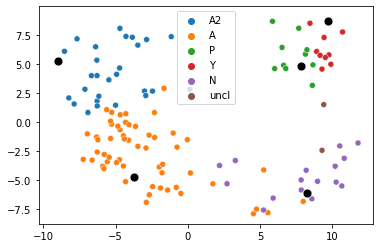

In [417]:
pcs_to_plot=[0,1]
pca= PCA(n_components=10)
data_net = pca.fit_transform(data[network_genes])
arc_net = pca.transform(arc.loc[network_genes].T)
print(arc_net)
sns.scatterplot(data_net[:,pcs_to_plot[0]],data_net[:,pcs_to_plot[1]], hue = clines['10_08_2020'])
sns.scatterplot(arc_net[:,pcs_to_plot[0]],arc_net[:,pcs_to_plot[1]], color = 'black', s = 80)


In [420]:
sig_matrix = pd.read_csv('../../data/sig_matrix_ParTI.csv', index_col = 0)

[[ 26.11480407 -13.39191144   0.20549963 -12.60307387   5.52219411
   -2.23132903  -0.11801131  -0.29884758  -0.30953861   0.52636511]
 [ 13.95697614 -13.09909579   7.97001936   9.5890698   -5.56516632
    4.95674913   1.63665158   1.9057469   -0.12395483  -1.77703375]
 [ 11.38378743  17.32889886  -5.4599773    2.113239    -1.24312026
   -0.10869053  -0.58559879  -0.16843711   0.28933294   0.65371537]
 [-13.91479339 -12.8741731   -6.76382407   0.7622892   -0.43512463
   -0.40954726  -0.07930919  -0.25961113   0.15375493  -0.24201067]
 [ -8.75556499   7.8613938    6.83313234  -2.11272597   1.75717141
   -0.77607335  -0.09345451  -0.28111649  -0.20587618   0.26250459]]


/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


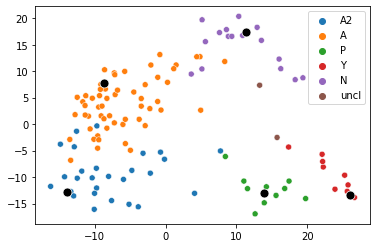

In [422]:
pcs_to_plot=[0,1]
pca= PCA(n_components=10)
data_net = pca.fit_transform(data[sig_matrix.index])
arc_net = pca.transform(arc.loc[sig_matrix.index].T)
print(arc_net)
sns.scatterplot(data_net[:,pcs_to_plot[0]],data_net[:,pcs_to_plot[1]], hue = clines['10_08_2020'])
sns.scatterplot(arc_net[:,pcs_to_plot[0]],arc_net[:,pcs_to_plot[1]], color = 'black', s = 80)


/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


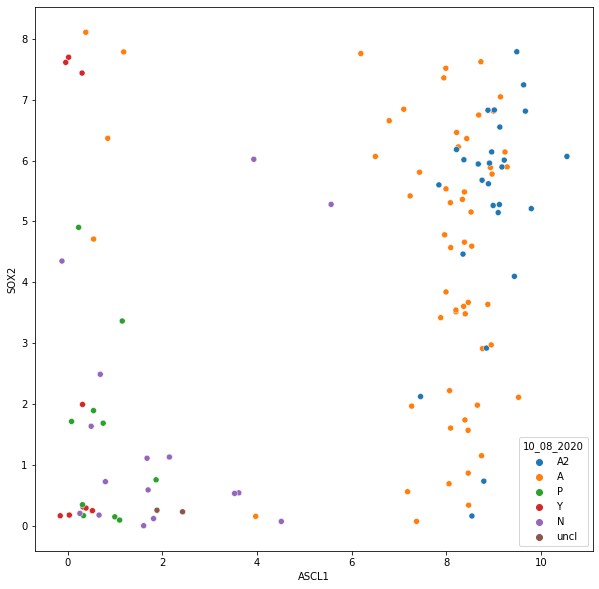

In [66]:
plt.figure(figsize = (10,10))
sns.scatterplot(data['ASCL1'],data['SOX2'], hue = clines['10_08_2020'])
# for (x,y, label) in zip(data['ASCL1'],data['SOX2'],clines.index):
#     if 'DMS114' in label :
#     plt.text(x,y,label)
# plt.savefig('mycl_myc.pdf')
